# Predicting Student Outcomes: From Data Exploration to Model Evaluation


This project predicts **student outcomes** (Graduate, Dropout, Enrolled) using a structured approach:

1. **Data Loading**:
   - Load the dataset from a CSV file.
   - Inspect the structure, dimensions, and sample records.
   - Ensure data integrity by checking for missing values and duplicates.

2. **Exploratory Data Analysis (EDA)**:
   - Visualize distributions of continuous and categorical variables.
   - Explore relationships between features and the target variable.
   - Detect outliers and correlations.

3. **Data Preprocessing**:
   - Handle missing values, duplicates, and outliers.
   - Encode categorical variables and balance the dataset using **SMOTE**.
   - Drop irrelevant or redundant features.

4. **Model Building**:
   - Train models: Naive Bayes, Decision Tree, Random Forest, XGBoost.

5. **Model Evaluation**:
   - Evaluate models using accuracy, F1-score, classification reports, and confusion matrices.
   - Visualize model performance and identify the best classifier.

This workflow ensures effective data preparation, exploration, and model selection for predicting student outcomes.


## 1. Data Loading

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.simplefilter('ignore')


D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 1.1 Loading and Inspecting the Dataset
First, we'll load the dataset and preview its structure and contents.


In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Leicester\Desktop\Final\Mohan\predict+students+dropout+and+academic+success\data.csv", sep=';')

# Display the first few rows
data.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Check the dimensions of the dataset
data.shape


(4424, 37)

### 1.2 Checking for Missing Values
It's essential to check if the dataset has any missing values.


In [4]:
# Check for null values
data.isnull().sum()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

#### Observations:
There are no missing values in the dataset.


### 1.3 Checking for Duplicate Rows
Duplicate rows can skew our analysis. Let's check and remove them if present.


In [5]:
# Check for duplicate rows
duplicate = data[data.duplicated()]
duplicate


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


#### Observations:
No duplicate rows were found.


In [6]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

### 1.4 Renaming Columns
To make the column names easier to work with, we'll replace spaces with underscores.


In [7]:
# Replace spaces with underscores in column names
data.columns = [col.replace(' ', '_') for col in data.columns]
data.head()


,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance\t,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 2. Exploratory Data Analysis (EDA)
Now, we'll dive deeper into the dataset to understand its features and relationships.


### 2.1 Summary of the Dataset

In [8]:
# Summary of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital_status                                  4424 non-null   int64  
 1   Application_mode                                4424 non-null   int64  
 2   Application_order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening_attendance	                     4424 non-null   int64  
 5   Previous_qualification                          4424 non-null   int64  
 6   Previous_qualification_(grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's_qualification                          4424 non-null   int64  
 9   Father's_qualification                   

### Observations:
- **Categorical Features**: Many integer-encoded variables represent categories rather than numeric values (e.g., `Marital Status`, `Application Mode`,`etc`).


### 2.2 Data Preparation

The dataset contains various discrete variables that are either ordinal or nominal in nature. These variables, though stored as integers, represent categories or levels of specific features.

---

#### 2.2.1 Separate Continuous and Discrete Variables
We begin by identifying continuous variables and isolating the remaining discrete variables.


In [9]:
# Get the list of continuous variables
num_data = [cname for cname in data.columns if data[cname].dtypes in ['float64']]
print("Continuous Variables:")
num_data


Continuous Variables:


['Previous_qualification_(grade)',
 'Admission_grade',
 'Curricular_units_1st_sem_(grade)',
 'Curricular_units_2nd_sem_(grade)',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [10]:
# Get the list of all numeric columns
cat_cols = data._get_numeric_data().columns
print("\nNumeric Columns:")
print(cat_cols)


Numeric Columns:
Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance\t', 'Previous_qualification',
       'Previous_qualification_(grade)', 'Nacionality',
       'Mother's_qualification', 'Father's_qualification',
       'Mother's_occupation', 'Father's_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Cu

In [11]:
# Extract discrete variables by subtracting continuous variables
cols = list(set(cat_cols) - set(num_data))
print("\nDiscrete Variables:")
cols




Discrete Variables:


['Application_mode',
 'Application_order',
 'Curricular_units_2nd_sem_(enrolled)',
 'Age_at_enrollment',
 'Previous_qualification',
 'Gender',
 'Curricular_units_2nd_sem_(approved)',
 "Mother's_occupation",
 'Curricular_units_1st_sem_(evaluations)',
 'Debtor',
 'Curricular_units_1st_sem_(credited)',
 'Tuition_fees_up_to_date',
 'Curricular_units_1st_sem_(enrolled)',
 'Curricular_units_1st_sem_(without_evaluations)',
 'Course',
 'Nacionality',
 "Mother's_qualification",
 'International',
 'Curricular_units_2nd_sem_(without_evaluations)',
 "Father's_occupation",
 'Curricular_units_2nd_sem_(evaluations)',
 'Scholarship_holder',
 'Marital_status',
 'Curricular_units_1st_sem_(approved)',
 'Displaced',
 'Curricular_units_2nd_sem_(credited)',
 'Educational_special_needs',
 "Father's_qualification",
 'Daytime/evening_attendance\t']

#### Observations:
- The dataset contains 7 continuous variables such as `Previous_qualification_(grade)` and `Admission_grade`....
- Remaining variables like `Marital_status`, `Application_mode`, and `Gender` are discrete.


### 2.3 Visualizing the Target Variable
We'll use a bar plot to display the counts of each category in the `Target` column.


In [12]:
# Analyze the target variable
data['Target'].value_counts()


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

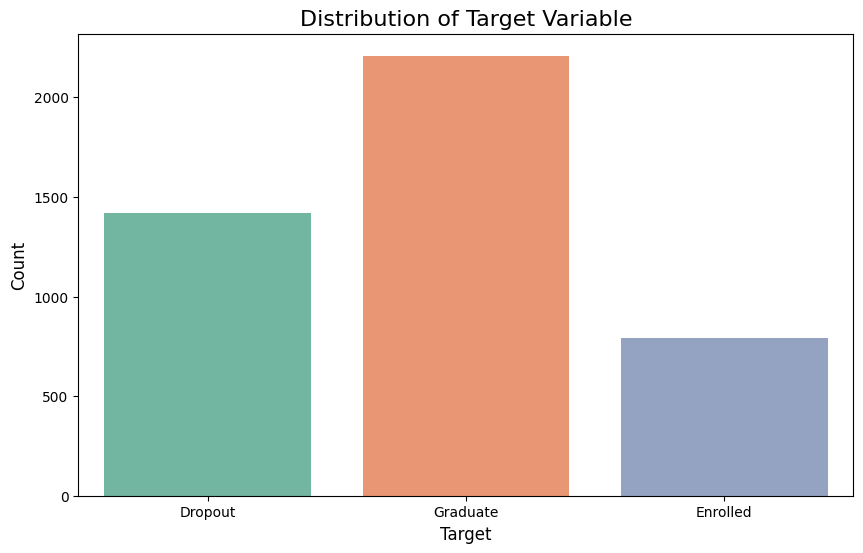

In [13]:
# Bar plot for the Target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Target', palette='Set2')
plt.title("Distribution of Target Variable", fontsize=16)
plt.xlabel("Target", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


#### Observations:
- The bar plot shows the count of each category:
  - "Graduate" is the highest category.
  - "Dropout" follows with a significant percentage.
  - "Enrolled" is the smallest category.



### 2.4 Analyze Continuous Variables

#### 2.4.1 Visualizing Continuous Variables
Let's analyze the distribution of numeric features.


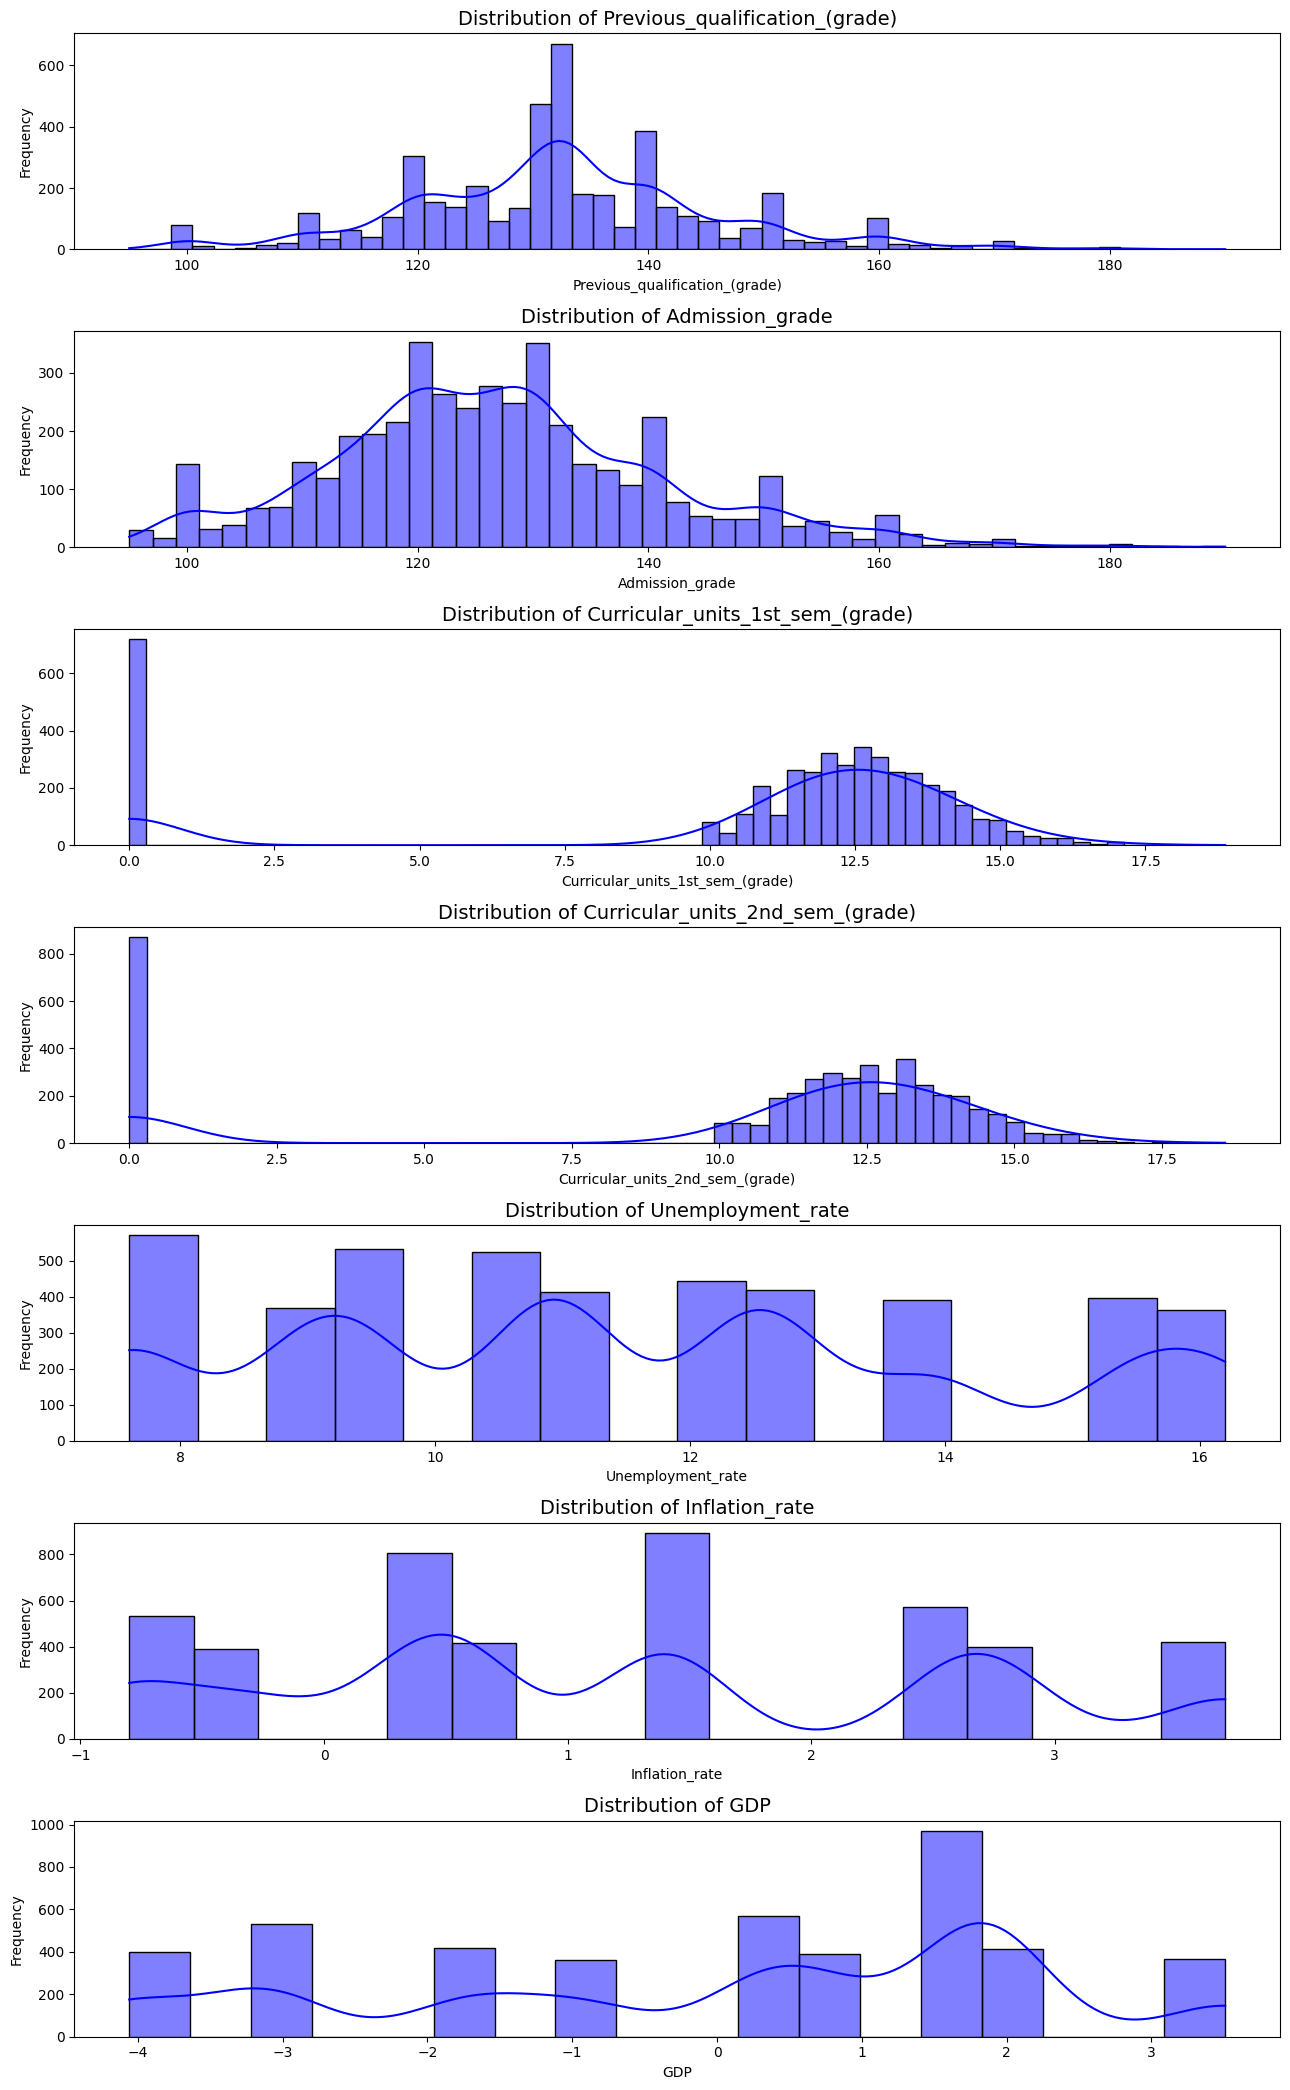

In [14]:
# Select continuous variables
data_num = data.select_dtypes(include=['float64'])

# Set up the figure
num_vars = len(data_num.columns)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(13, num_vars * 3))

# Plot each distribution
for i, col in enumerate(data_num.columns):
    sns.histplot(data[col], kde=True, ax=axes[i], color='blue')  
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


#### Observations from the Distribution Plots

1. **Previous Qualification and Admission Grades**: Both exhibit a near-normal distribution centered around 130, with slight skewness in the previous qualification grades.

2. **Curricular Units (1st & 2nd Sem Grades)**: A significant spike at 0 suggests dropouts or failures, while the remaining grades show a normal distribution centered around 10–12.5.

3. **Unemployment Rate**: Multimodal distribution with peaks around 9, 12, and 15, indicating varying unemployment levels.

4. **Inflation Rate**: Peaks near 0 and 2 suggest economic variability, with both negative and positive inflation rates observed.

5. **GDP**: Multimodal distribution with peaks near -3 and 2, reflecting diverse economic conditions.

#### Key Insight:
Grades show normal trends except for notable dropouts in curricular units, while economic variables highlight significant variability in the dataset.


#### 2.4.2 Box Plot for Outliers
Box plots help identify outliers in the dataset.


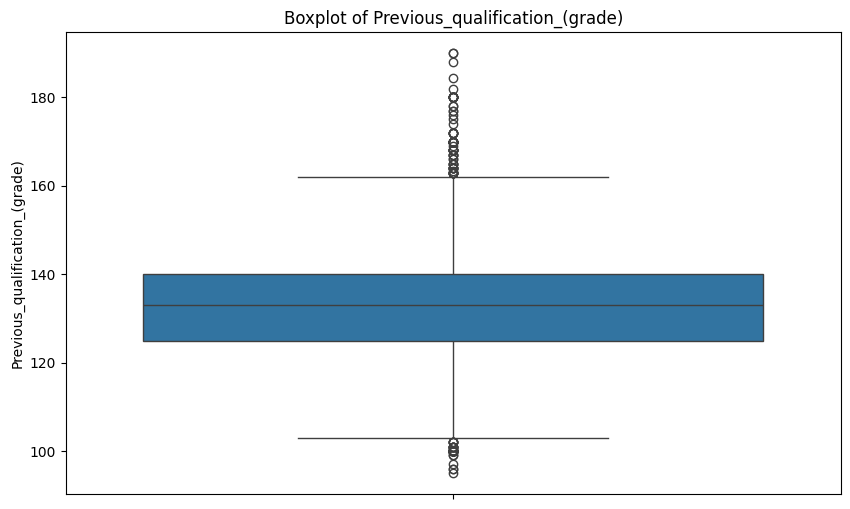

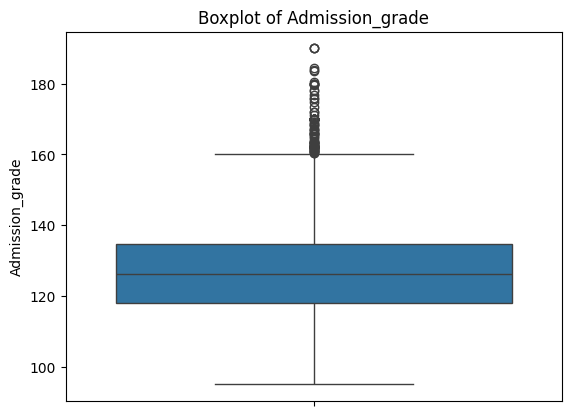

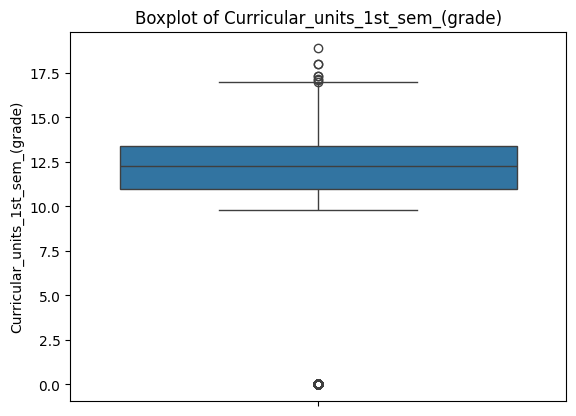

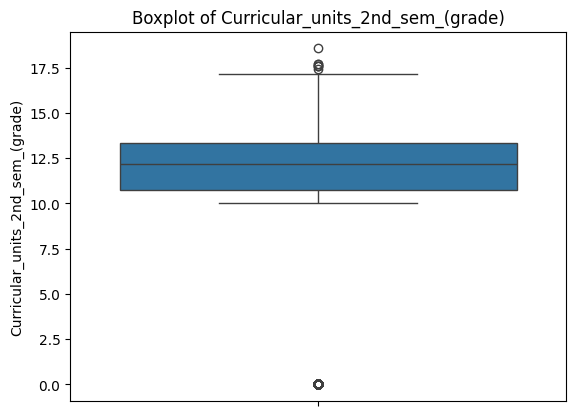

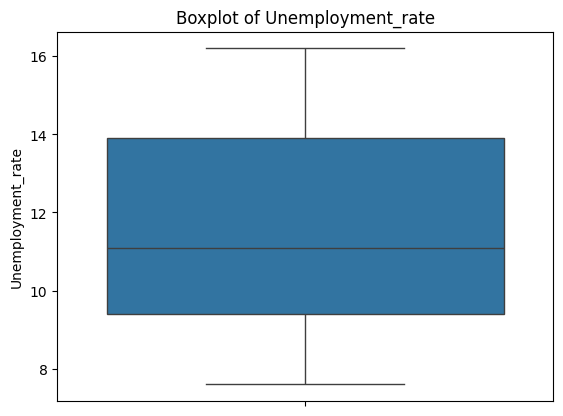

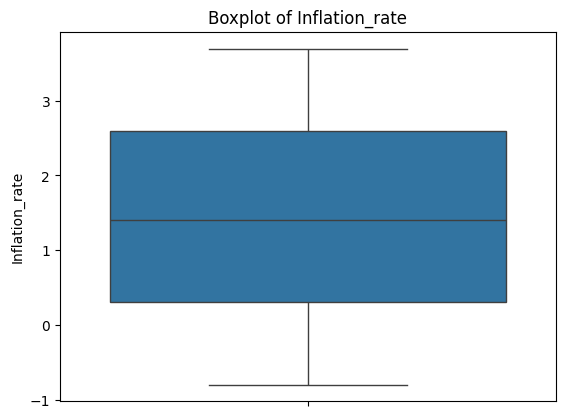

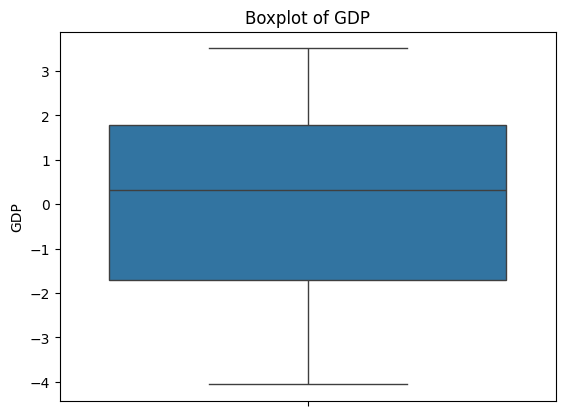

In [15]:
# Box plot for continuous variables
plt.figure(figsize=(10, 6))
for col in data_num.columns:
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


#### Observations:
- Several features contain outliers, except for `Unemployment_rate`, `Inflation_rate`, and `GDP`.


### 2.5 Visualizing Categorical Data

We will create count plots for some key categorical variables to understand their distributions.


#### 2.5.1 Selection of Key Discrete Variables for Analysis

From the list of all discrete variables, We selected 15 key features from the dataset to analyze their relationship with the target variable (`Target`). These features were chosen based on their relevance, diversity, and ability to provide meaningful insights into student outcomes. 

#### 1. **Demographic Factors**:
- **`Marital_status`**: Marital status might influence students' ability to graduate or continue enrollment.
- **`Gender`**: Helps uncover potential differences in outcomes between male and female students.
- **`Age_at_enrollment`**: Age may correlate with maturity levels or other factors affecting academic success.

#### 2. **Parental Background**:
- **`Mother's_occupation`** and **`Father's_occupation`**: Parental occupations reflect socio-economic status, which can impact academic performance.
- **`Mother's_qualification`** and **`Father's_qualification`**: Parental education levels are known to influence students' educational outcomes.

#### 3. **Academic Indicators**:
- **`Application_order`**: The priority students place on their application can indicate interest and engagement.
- **`Application_mode`**: Different modes of application might reflect varying levels of preparedness or opportunity.
- **`Course`**: Certain courses might show distinct trends in dropout or graduation rates.

#### 4. **Financial Factors**:
- **`Tuition_fees_up_to_date`**: Late fee payments may indicate financial stress, which can correlate with dropout rates.
- **`Scholarship_holder`**: Scholarships often play a role in improving retention and graduation rates.
- **`Debtor`**: Being in debt could increase the likelihood of dropping out due to financial pressures.

#### 5. **Special Considerations**:
- **`Displaced`**: Displacement may present unique challenges that influence academic success.
- **`Nacionality`**: Different nationalities might exhibit trends based on cultural or regional factors.

---

### Why Not Other Features?

- **Granularity**: Features like `Curricular_units_1st_sem_(evaluations)`or `Curricular_units_2nd_sem_(credited)` are too specific for this stage.
- **Redundancy**: Similar features were excluded to avoid overlapping insights.
- **Clarity**: These 15 features balance interpretability and relevance for understanding student outcomes.

By focusing on these features, we can derive meaningful insights into the factors affecting student outcomes.


#### 2.5.2 Univariate Analysis of Categorical Variables

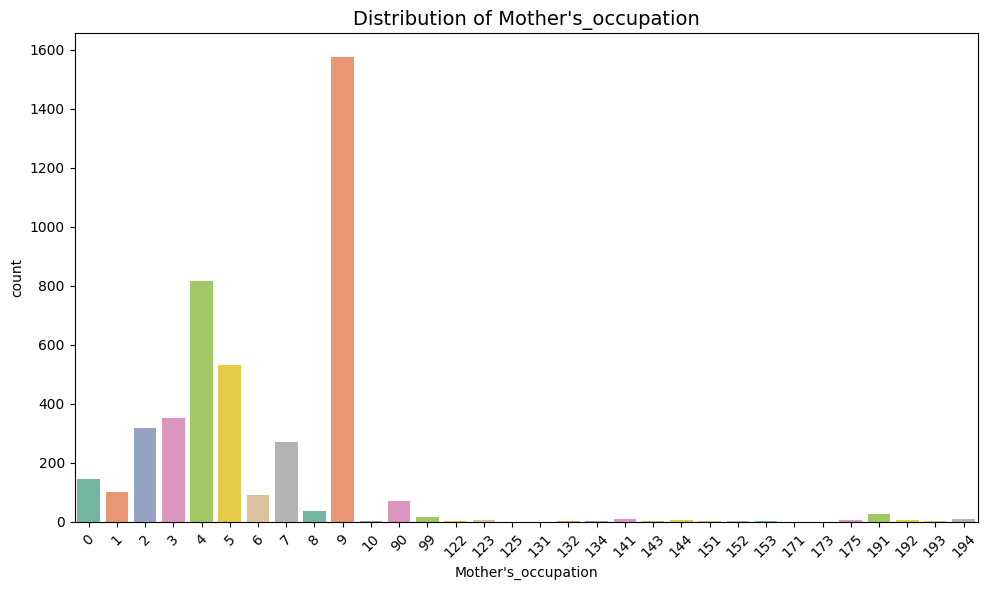

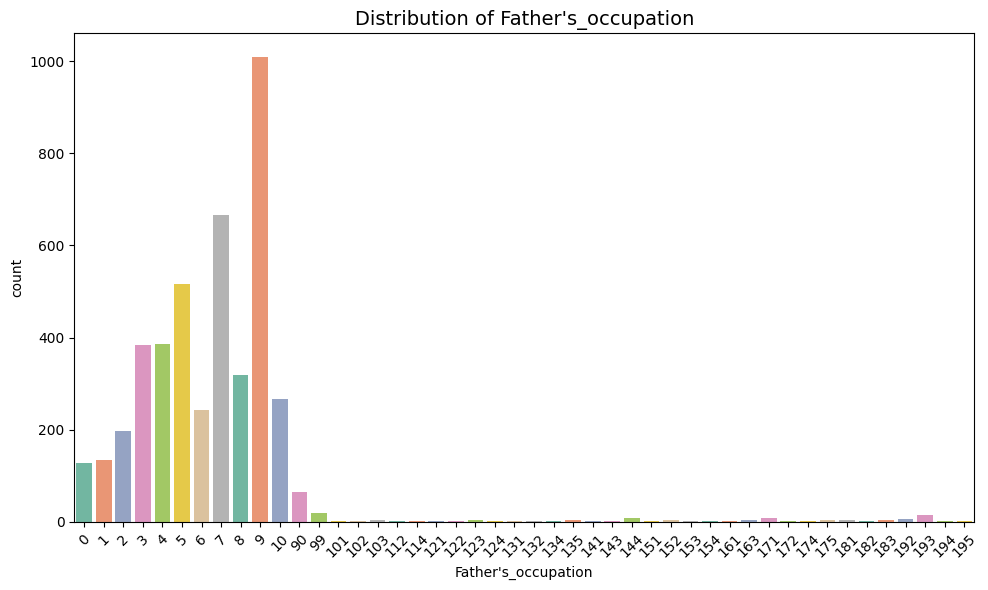

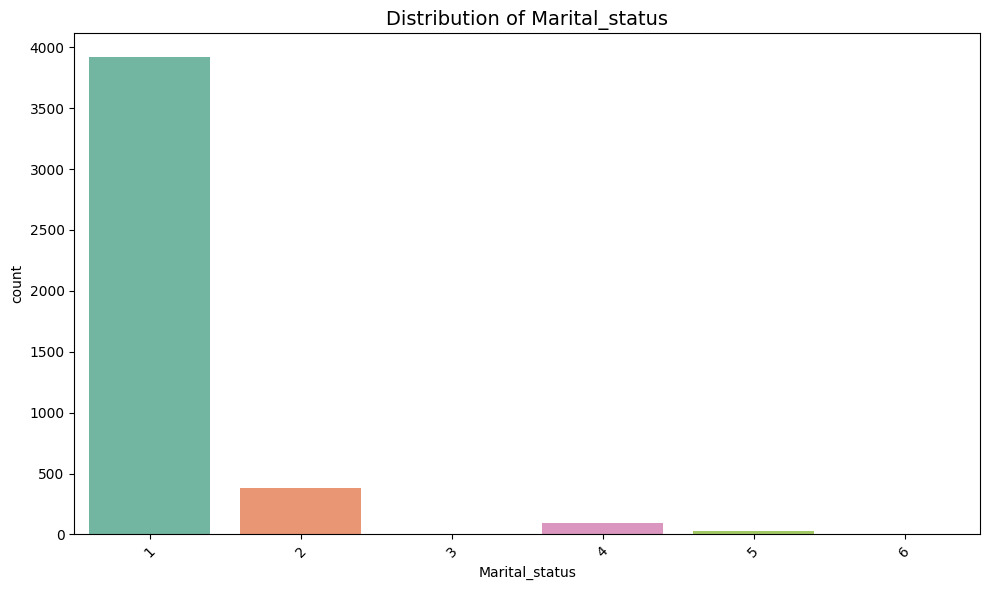

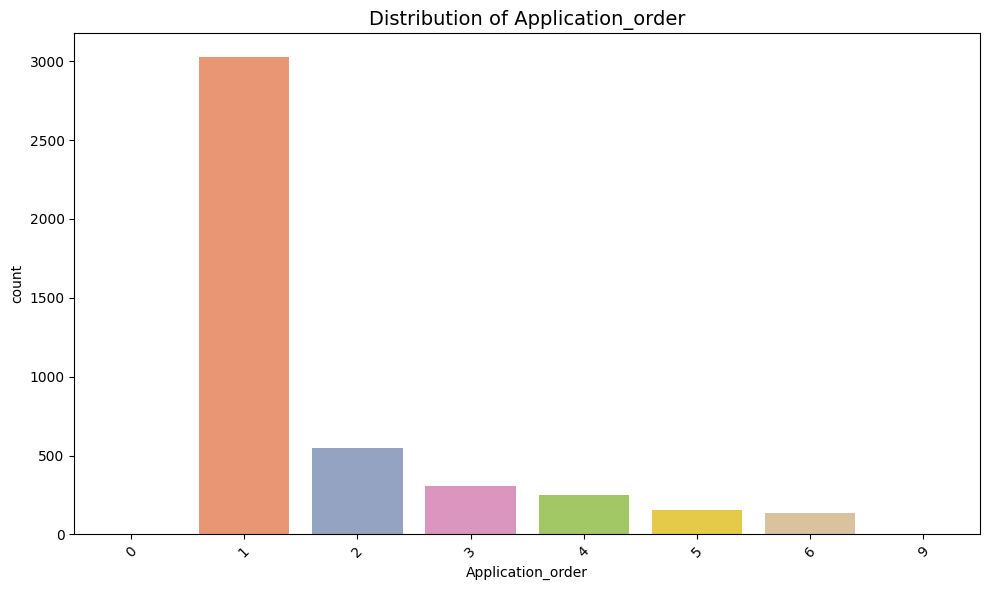

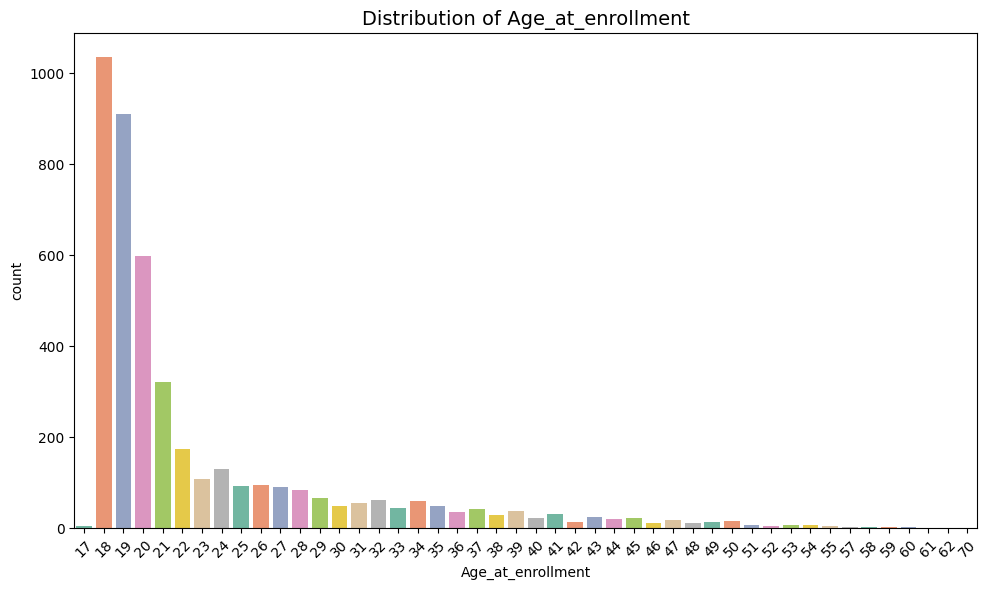

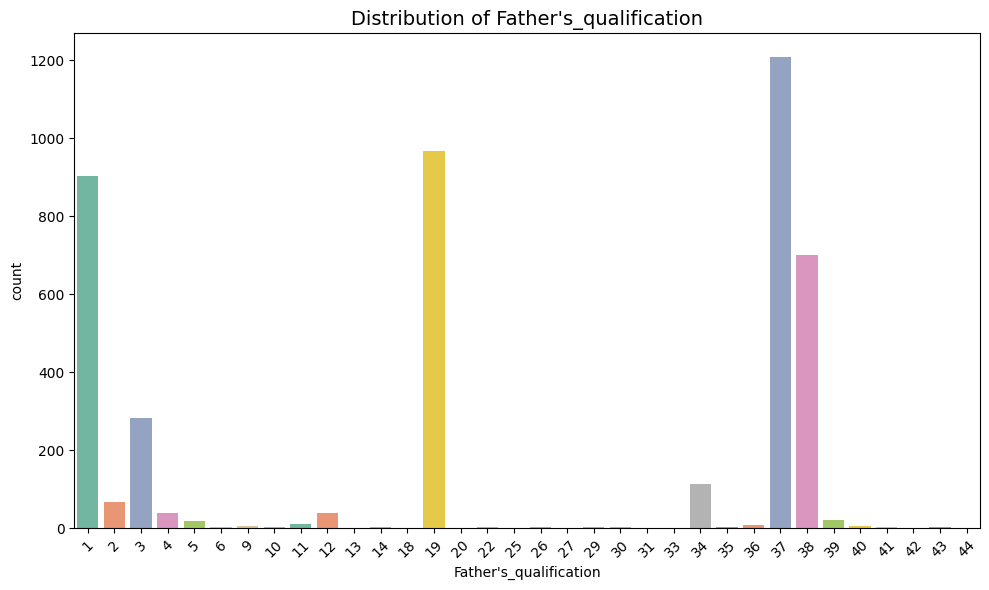

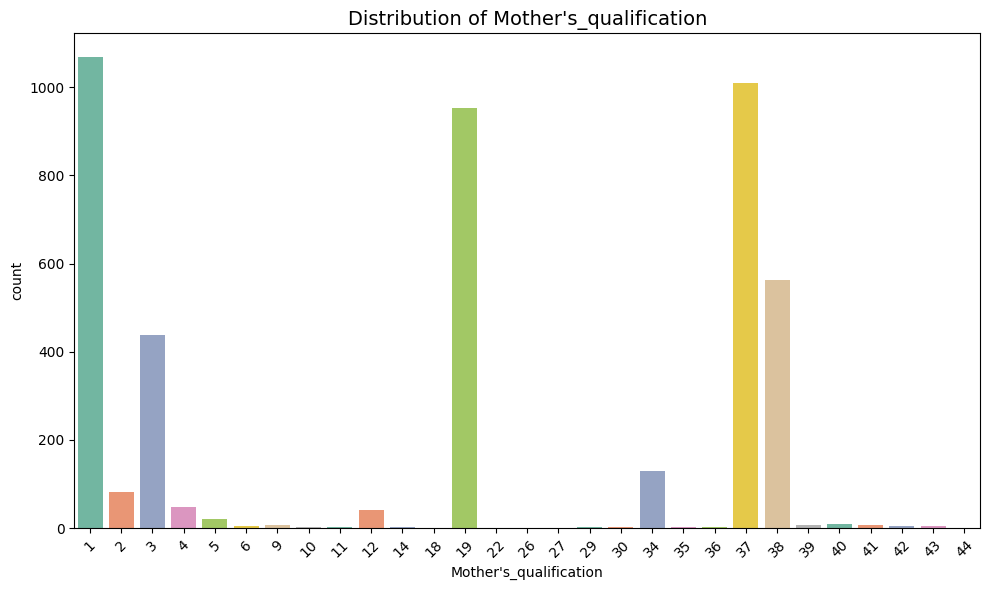

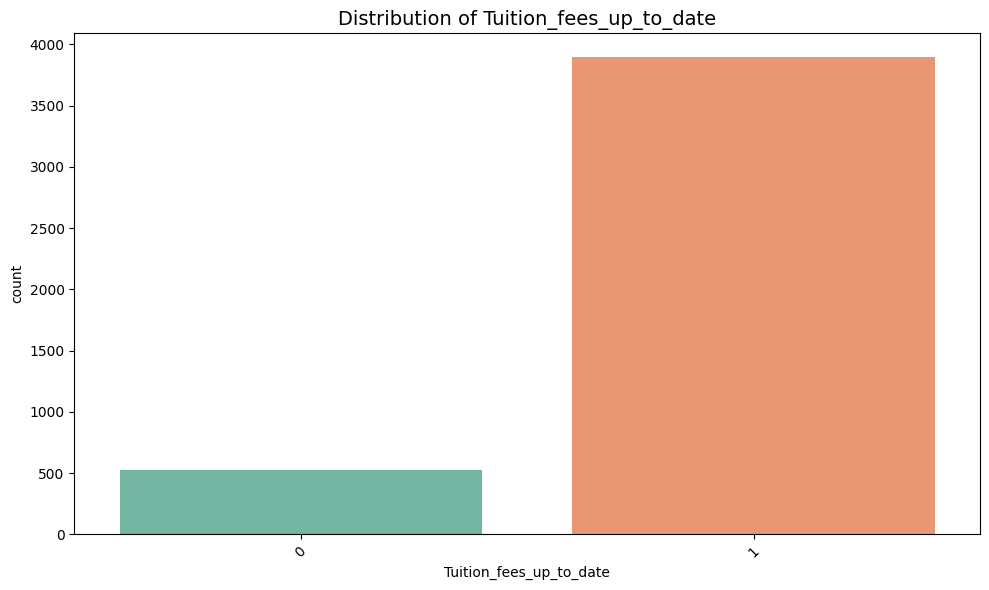

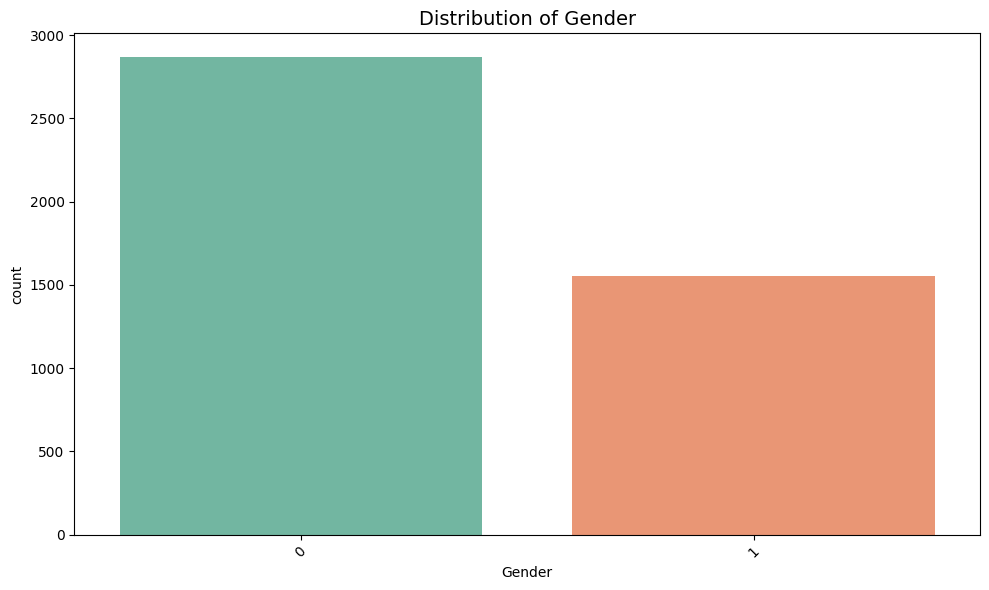

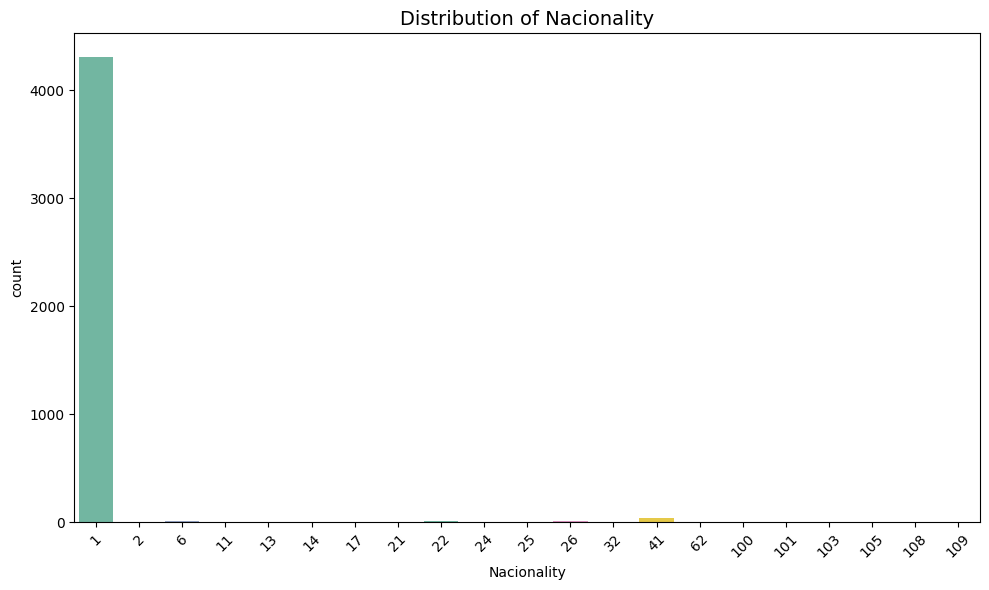

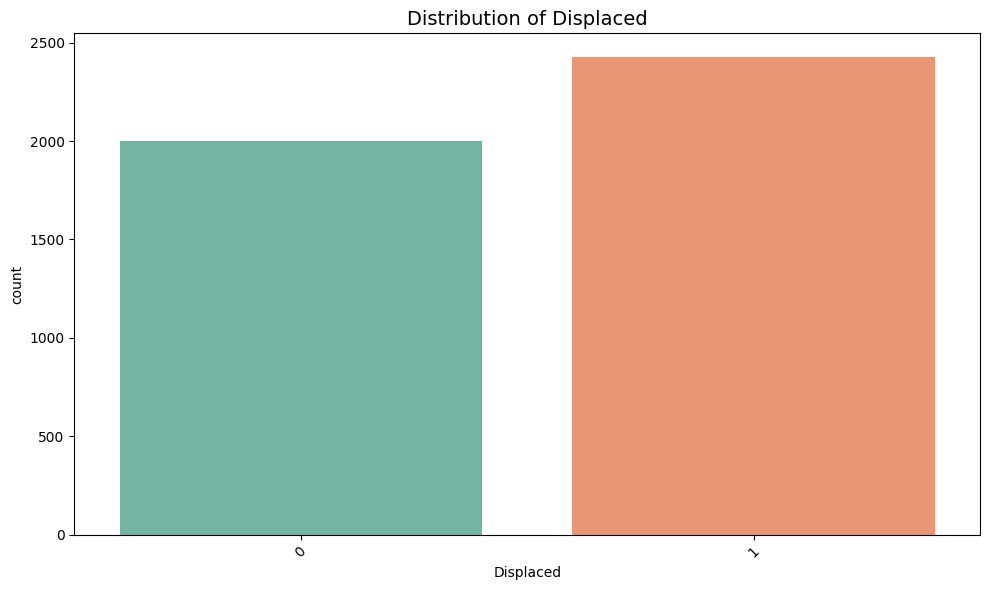

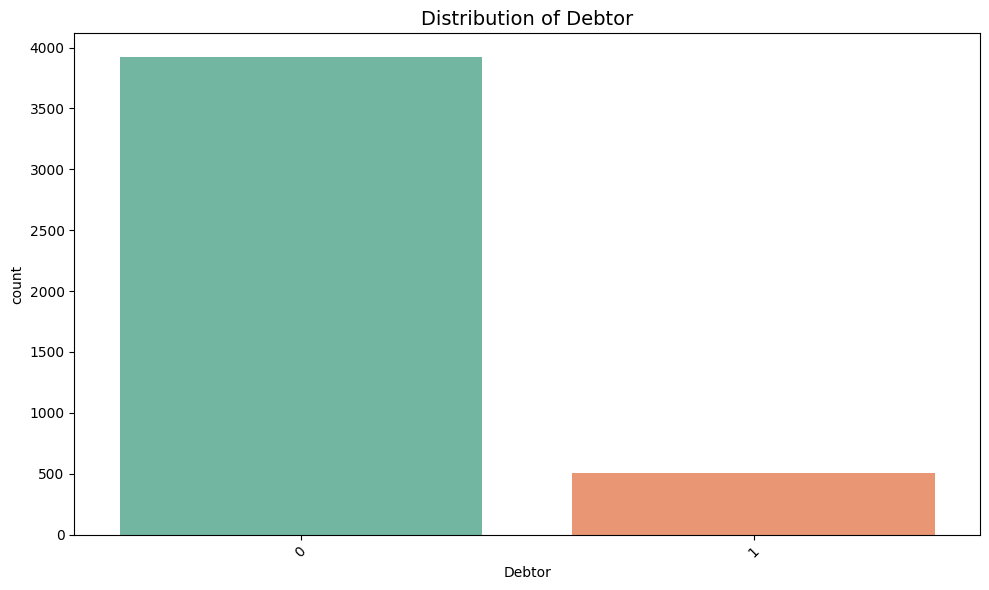

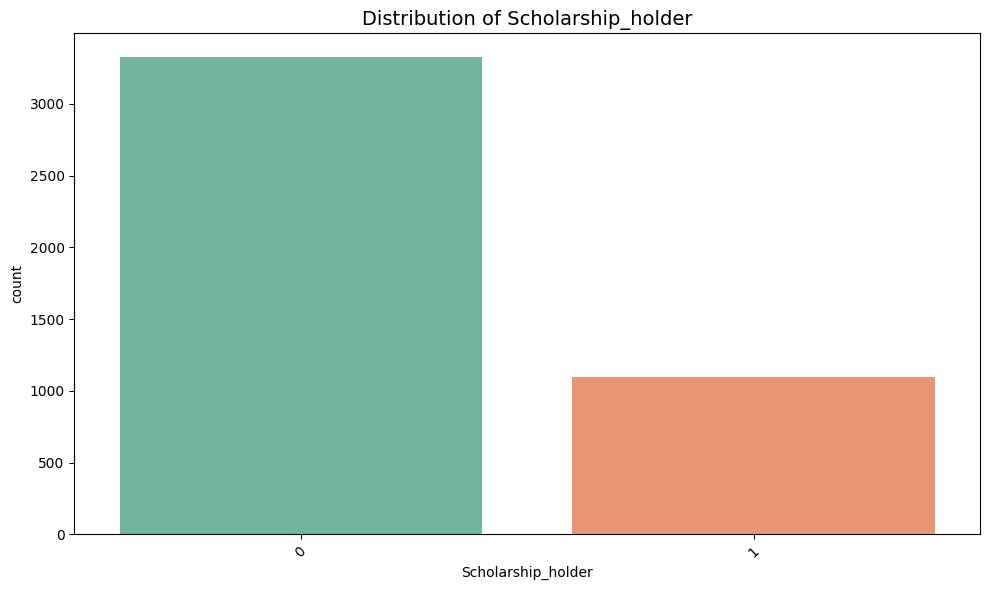

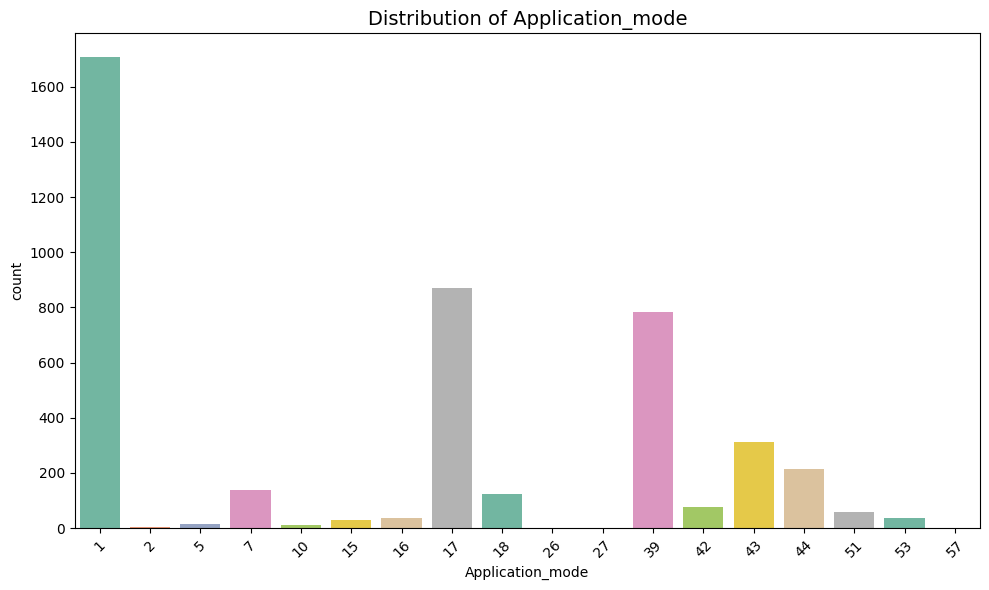

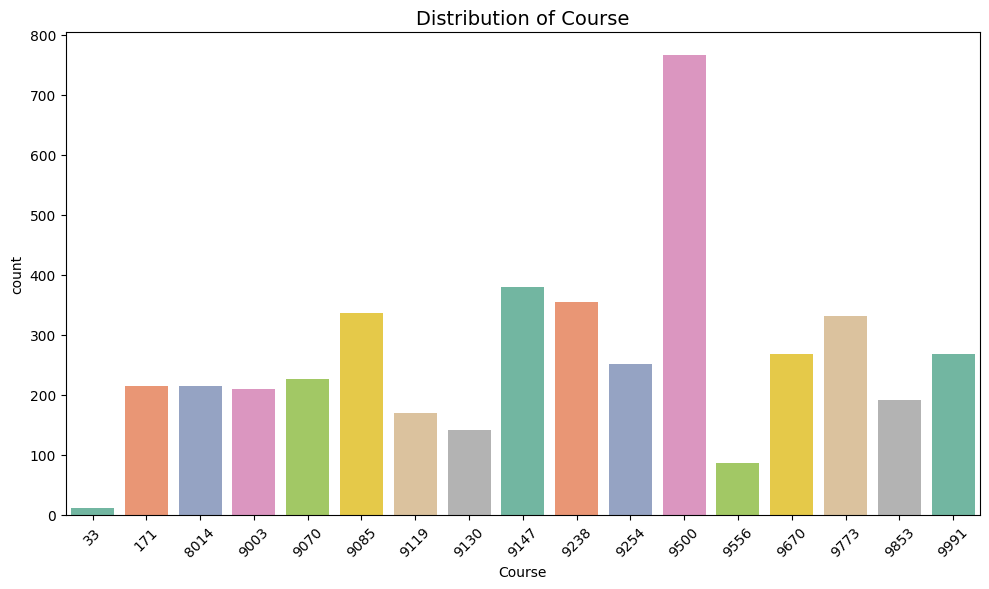

In [16]:
# List of key discrete variables for univariate analysis
cols_ = [
    "Mother's_occupation",
    "Father's_occupation",
    'Marital_status',
    'Application_order',
    'Age_at_enrollment',
    "Father's_qualification",
    "Mother's_qualification",
    'Tuition_fees_up_to_date',
    'Gender',
    "Nacionality",
    'Displaced',
    'Debtor',
    "Scholarship_holder",
    'Application_mode',
    'Course'
]

# Plot count plots for each variable
for col in cols_:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Observations from Categorical Variables:

1. **Mother's Occupation**: Most mothers are unskilled workers or administrative staff, reflecting a specific socio-economic background.

2. **Father's Occupation**: Similar to mothers, fathers are also predominantly unskilled workers or administrative staff.

3. **Marital Status**: Over 90% of the students are single, which aligns with the typical demographic of young students in higher education.

4. **Age at Enrollment**: The majority of students are between 18 and 20 years old, suggesting most students start higher education right after completing high school.

5. **Gender**: More than 60% of the students are female, indicating a higher representation of women in this dataset.

6. **Tuition Fees Up-to-Date**: A vast majority of students (over 90%) pay their fees on time, showcasing financial stability or institutional support.

7. **Course Enrollment**: Nursing is the most popular course, followed by Management and Social Services, suggesting career-oriented education preferences.

8. **Displaced Status**: The dataset shows a relatively balanced distribution between displaced and non-displaced students, reflecting diversity in student demographics.

9. **Debtor Status**: A small percentage of students are marked as debtors, indicating that most students maintain financial accountability.

10. **Scholarship Holders**: While many students do not hold scholarships, a significant proportion benefits from financial aid programs.

11. **Application Mode**: Application mode `1` is overwhelmingly preferred, indicating a dominant or streamlined platform for applications.

12. **Course Enrollment Trends**: Apart from Nursing, Management, Social Services, and Economics see consistent enrollment, indicating popular career fields.

13. **Father's Qualification**: Fathers' educational levels are skewed towards basic education or specific professional qualifications, indicating limited academic diversity.

14. **Mother's Qualification**: Similar to fathers, mothers’ qualifications are also concentrated in basic education or professional training.

15. **Nationality**: The majority of students are from a single dominant nationality, with very few international or minority nationalities represented in the dataset.


### 2.6 Bivariate Analysis: Impact on the Target Variable

Let's analyze the relationship between categorical variables and the target (`Graduate`, `Dropout`, `Enrolled`).


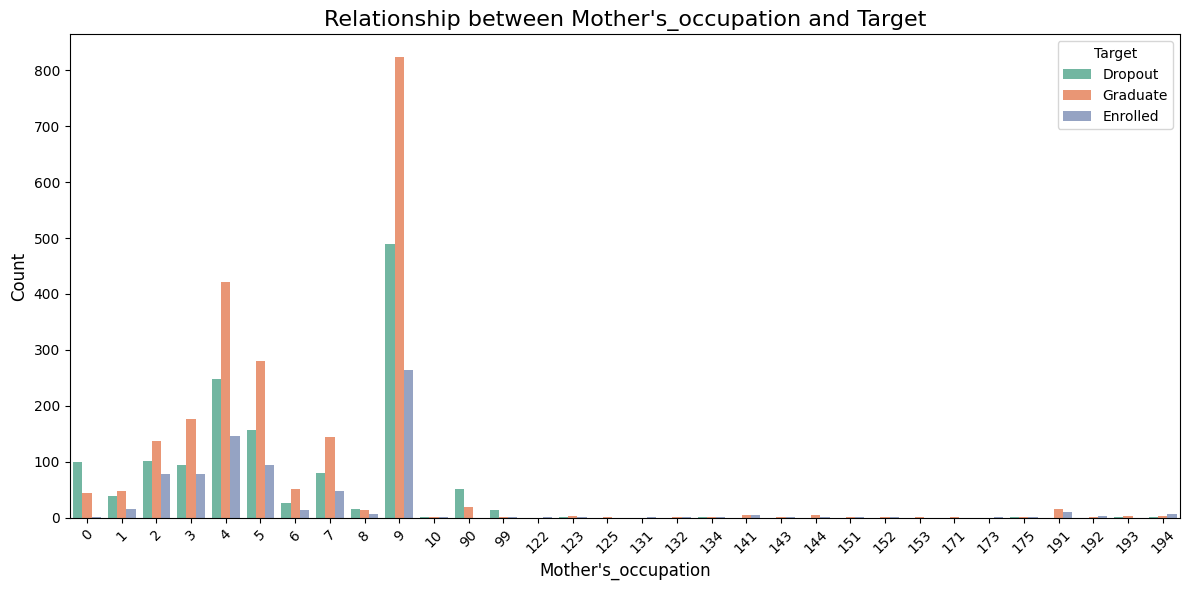

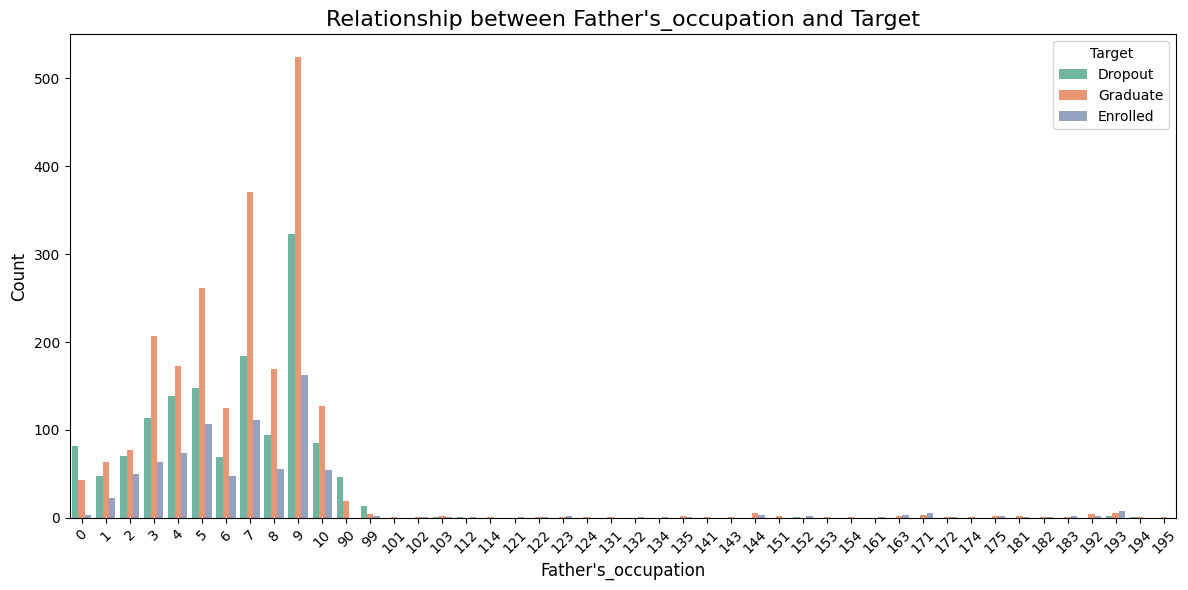

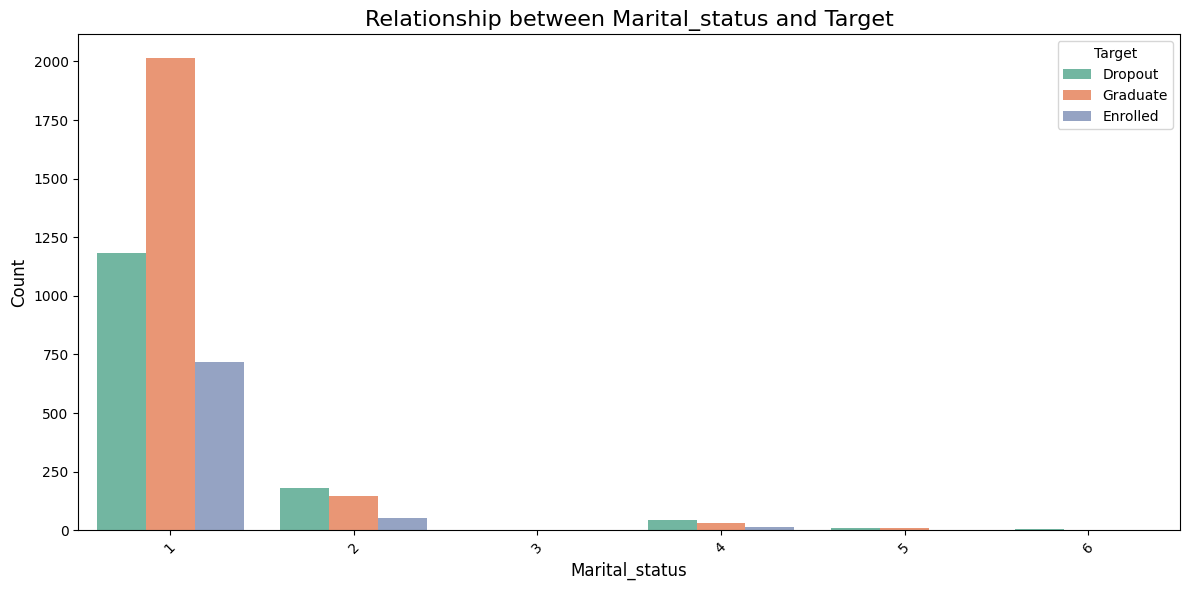

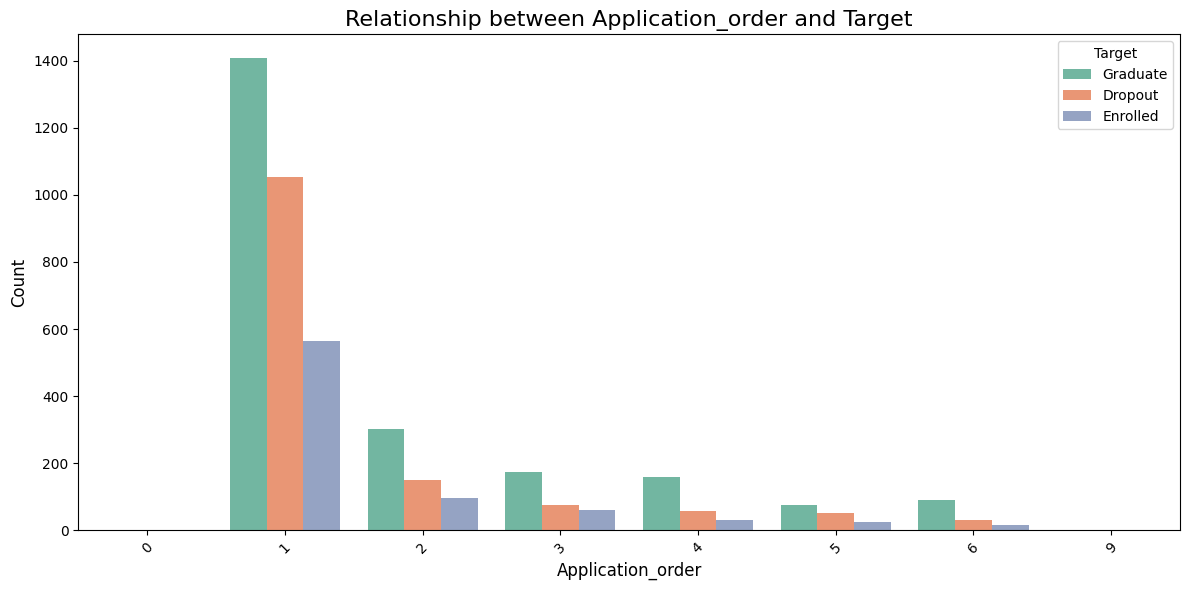

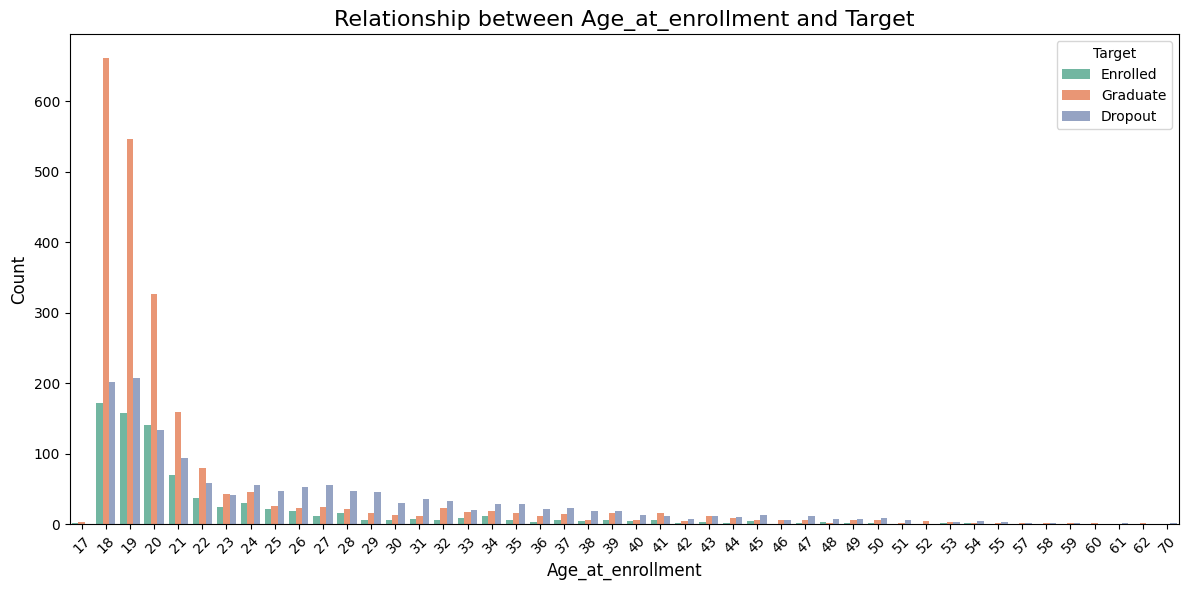

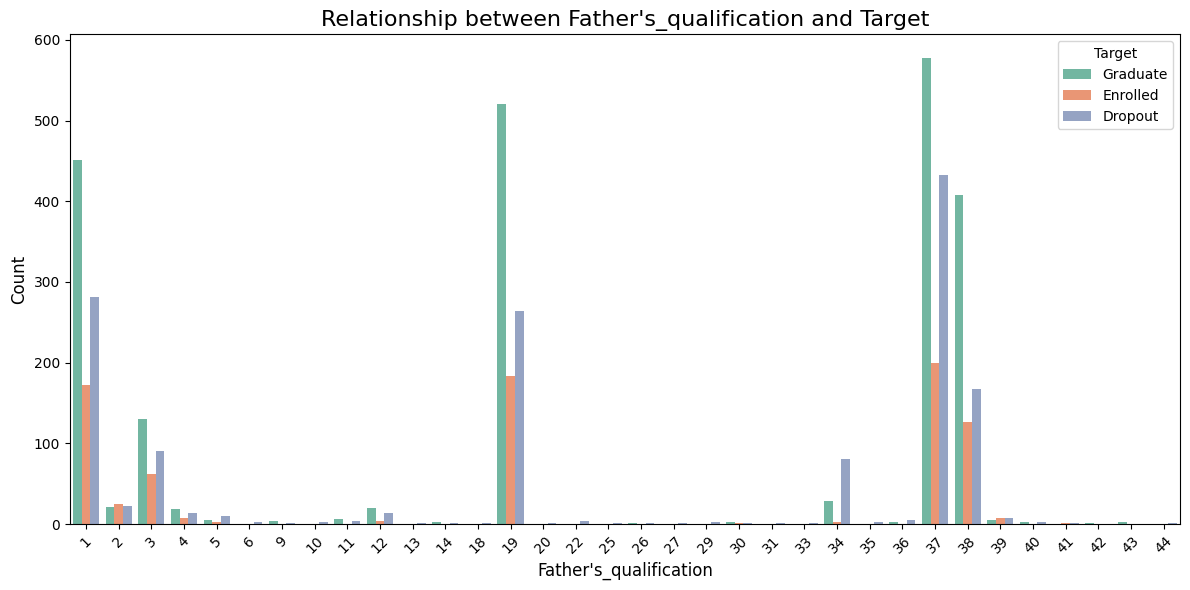

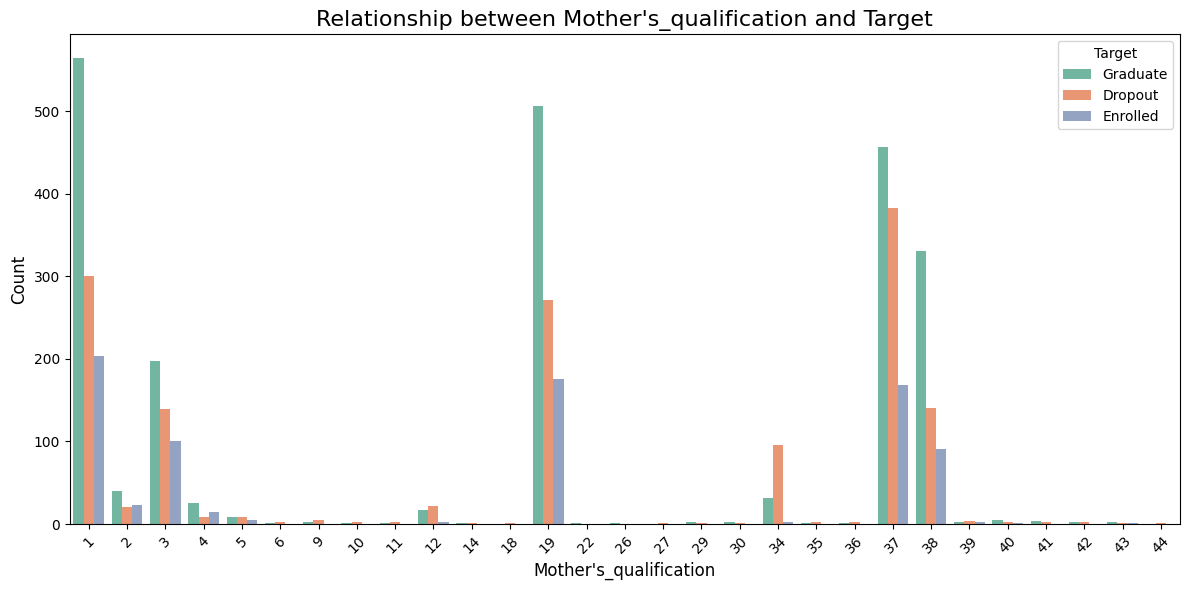

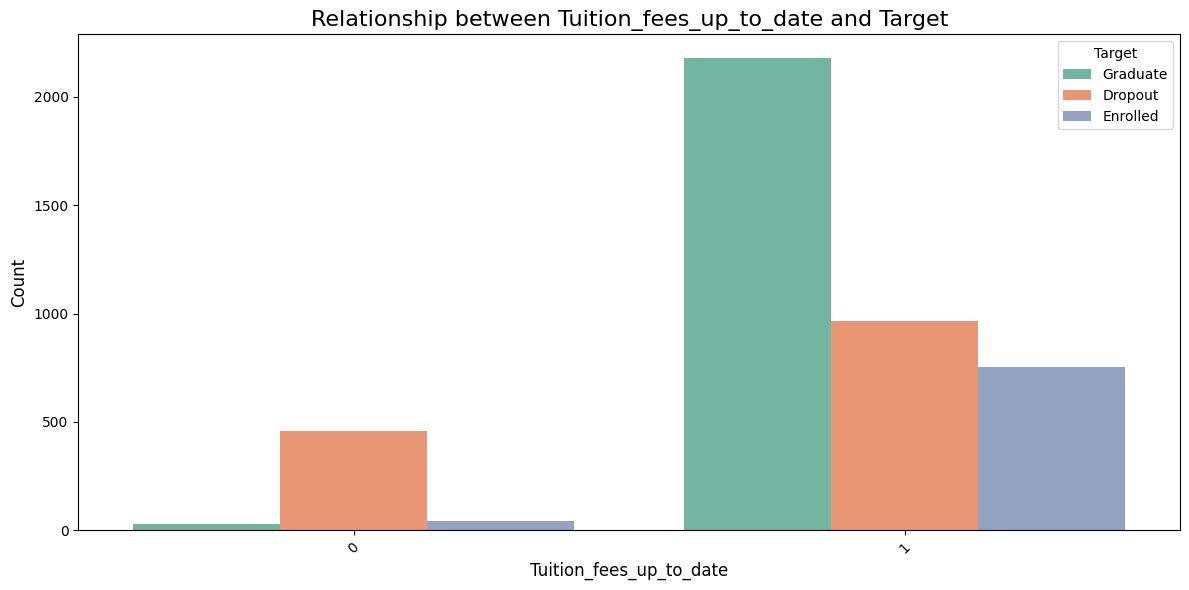

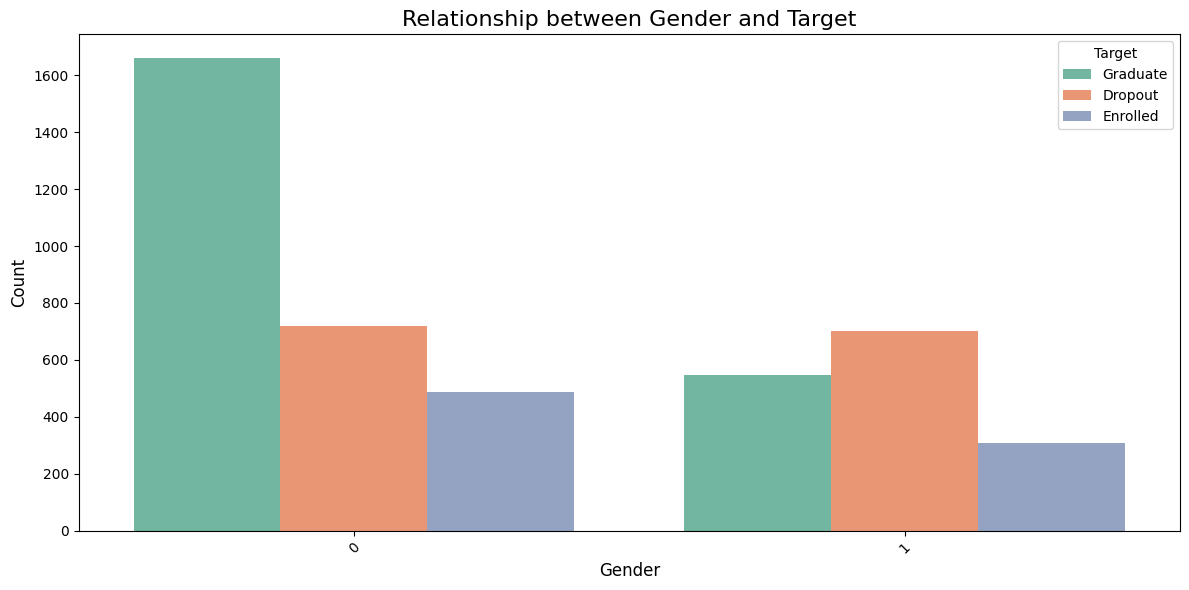

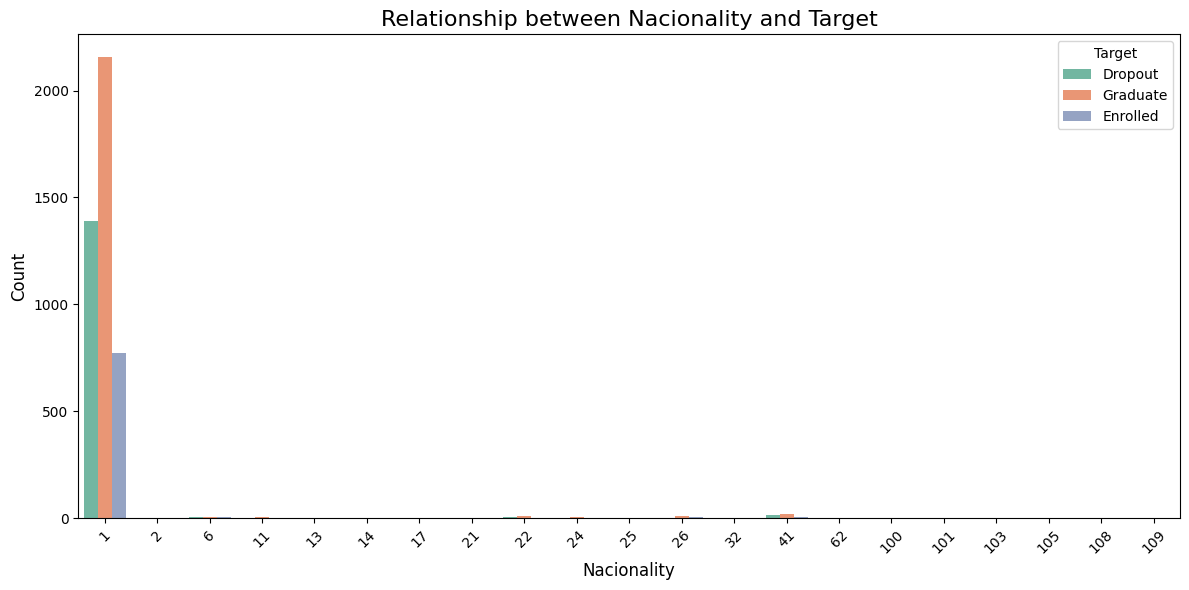

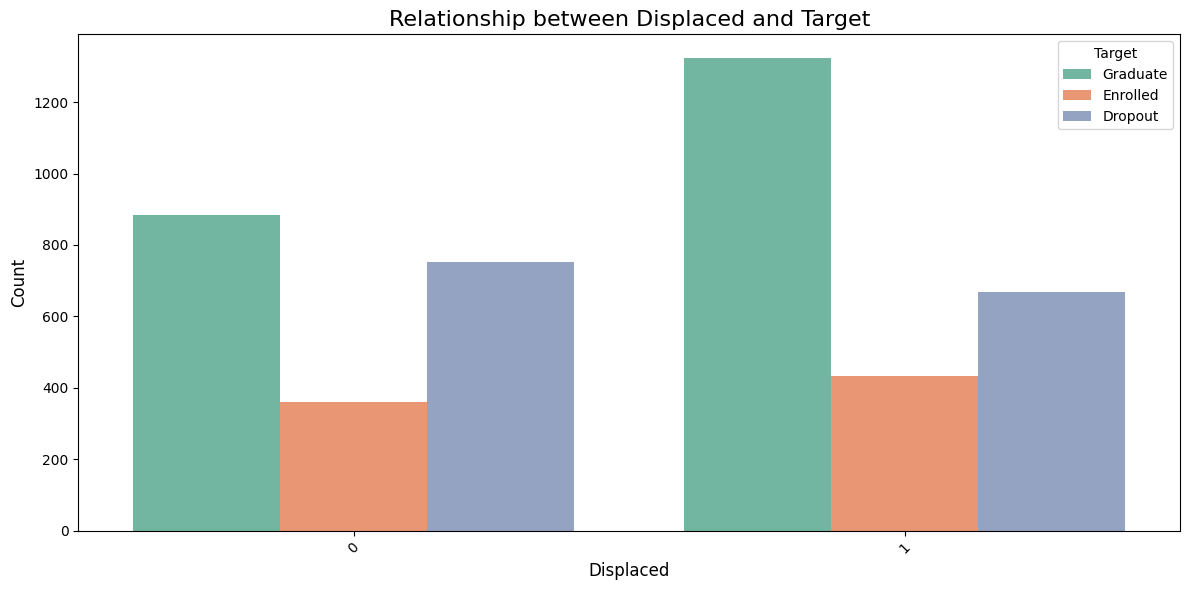

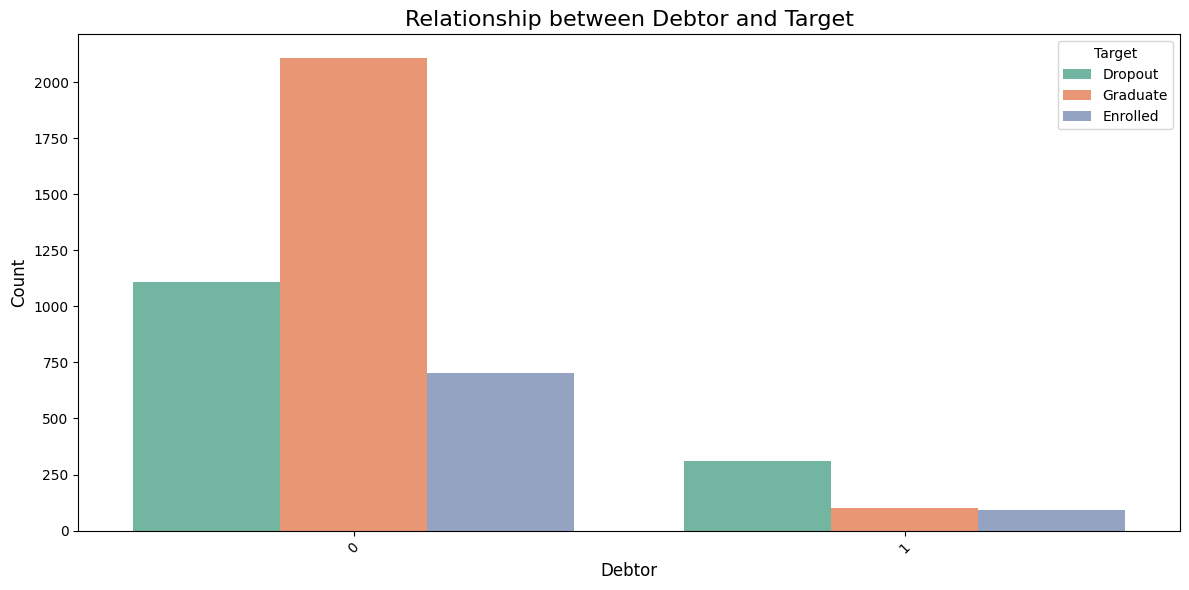

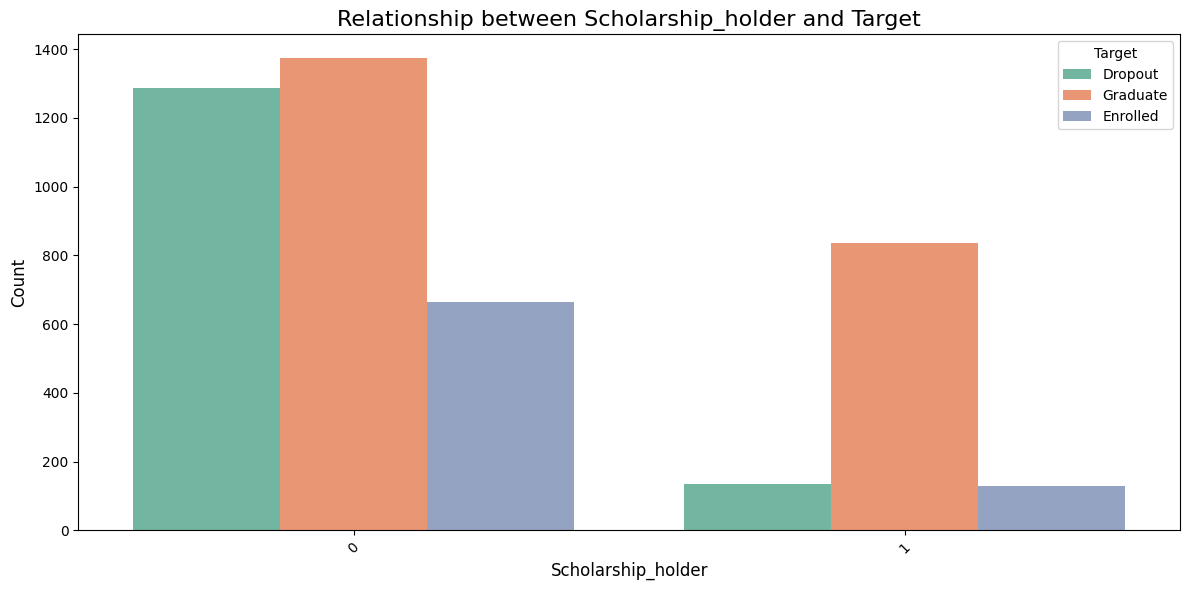

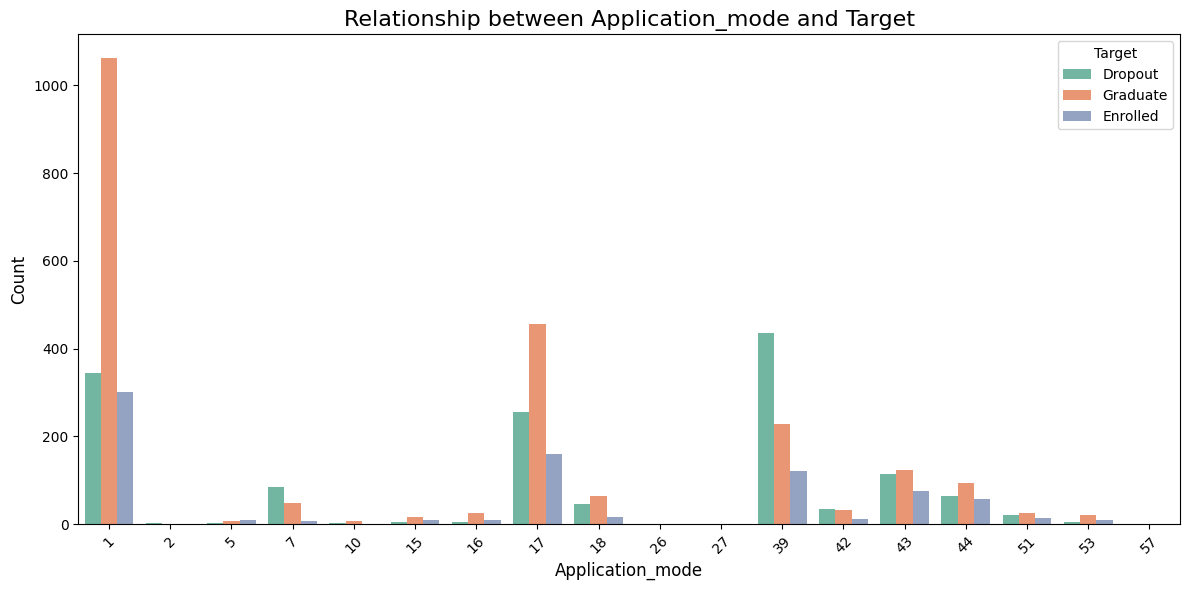

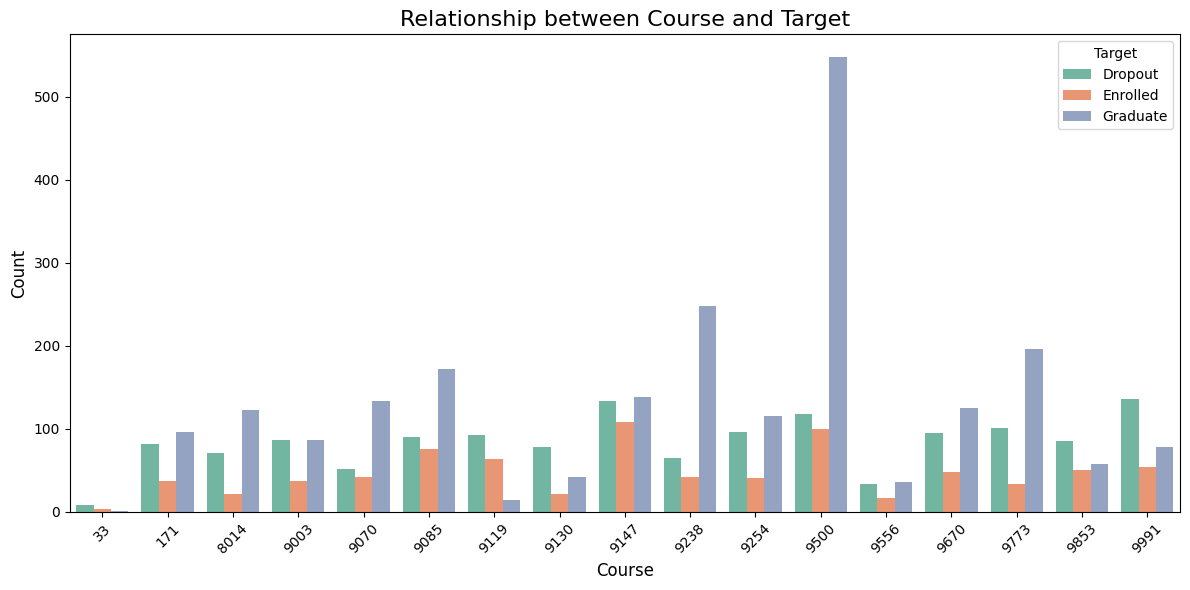

In [17]:
# List of features for bivariate analysis
cols_ = [
    "Mother's_occupation",
    "Father's_occupation",
    'Marital_status',
    'Application_order',
    'Age_at_enrollment',
    "Father's_qualification",
    "Mother's_qualification",
    'Tuition_fees_up_to_date',
    'Gender',
    "Nacionality",
    'Displaced',
    'Debtor',
    "Scholarship_holder",
    'Application_mode',
    'Course'
]

# Create individual count plots for each variable with Target
for col in cols_:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Target', data=data, palette='Set2')
    plt.title(f"Relationship between {col} and Target", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Observations from the Plots

#### 1. **Relationship between Mother's Occupation and Target**
- Students whose mothers work as administrative staff or in unskilled occupations are more likely to graduate.
- Dropouts are prevalent among students whose mothers have no recorded occupation or work in unskilled jobs.

#### 2. **Relationship between Father's Occupation and Target**
- Fathers with unskilled or administrative roles have a higher proportion of students graduating.
- A significant number of dropouts are linked to students with fathers in unskilled occupations.

#### 3. **Relationship between Marital Status and Target**
- The majority of the students are single, with a higher graduation rate among single students.
- Married students show a slightly higher dropout rate compared to single students.

#### 4. **Relationship between Application Order and Target**
- Students who applied first (application order = 1) have the highest graduation rate.
- Dropout rates increase for students who applied in subsequent orders.

#### 5. **Relationship between Age at Enrollment and Target**
- Students aged 18-20 have the highest graduation rate.
- Dropout rates increase slightly for students above 25 years of age.

#### 6. **Relationship between Father's Qualification and Target**
- Fathers with primary or secondary education are associated with higher graduation rates among students.
- Students with fathers holding no formal qualification have a higher likelihood of dropping out.

#### 7. **Relationship between Mother's Qualification and Target**
- Similar to fathers, mothers with secondary education have a higher rate of students graduating.
- Students with mothers holding no formal qualification have a higher dropout rate.

#### 8. **Relationship between Tuition Fees Up-to-Date and Target**
- Students who have paid their tuition fees on time have a significantly higher graduation rate.
- Dropouts are more common among students who have not paid their fees.

#### 9. **Relationship between Gender and Target**
- Female students show a higher graduation rate compared to male students.
- Dropouts are relatively balanced between genders but slightly higher for males.

#### 10. **Relationship between Nationality and Target**
- The majority of the students belong to nationality group 1, with a higher graduation rate in this group.
- Dropouts are minimal in other nationality groups due to their smaller representation.

#### 11. **Relationship between Displaced and Target**
- Non-displaced students have a higher graduation rate compared to displaced students.
- Displacement slightly increases the likelihood of dropping out.

#### 12. **Relationship between Debtor and Target**
- Students who are not in debt (debtor = 0) have a significantly higher graduation rate.
- Dropouts are more common among students who are in debt.

#### 13. **Relationship between Scholarship Holder and Target**
- Students who do not hold scholarships have a higher graduation rate.
- Scholarship holders have a slightly higher rate of enrollment but a lower graduation rate.

#### 14. **Relationship between Application Mode and Target**
- Application mode 1 has the highest graduation rate among all modes.
- Dropouts are more distributed across different application modes but slightly higher for mode 1.

#### 15. **Relationship between Course and Target**
- Nursing and Management courses have the highest graduation rates.
- Dropouts are more common in less popular courses or technical programs.
- Enrollment is higher in courses like Social Service and Engineering.

### General Insights
- Timely payment of tuition fees and having educated parents (especially secondary education) positively correlate with graduation rates.
- External factors like displacement, debt, and scholarship status seem to impact dropout rates negatively.
- Gender differences suggest a higher performance for female students in terms of graduation.
- Course selection plays a vital role, with some courses like Nursing showing significantly higher graduation rates.


### 2.7 Multivariate Analysis

#### 2.7.1 Correlation Heatmap
A heatmap displays relationships between continuous variables.


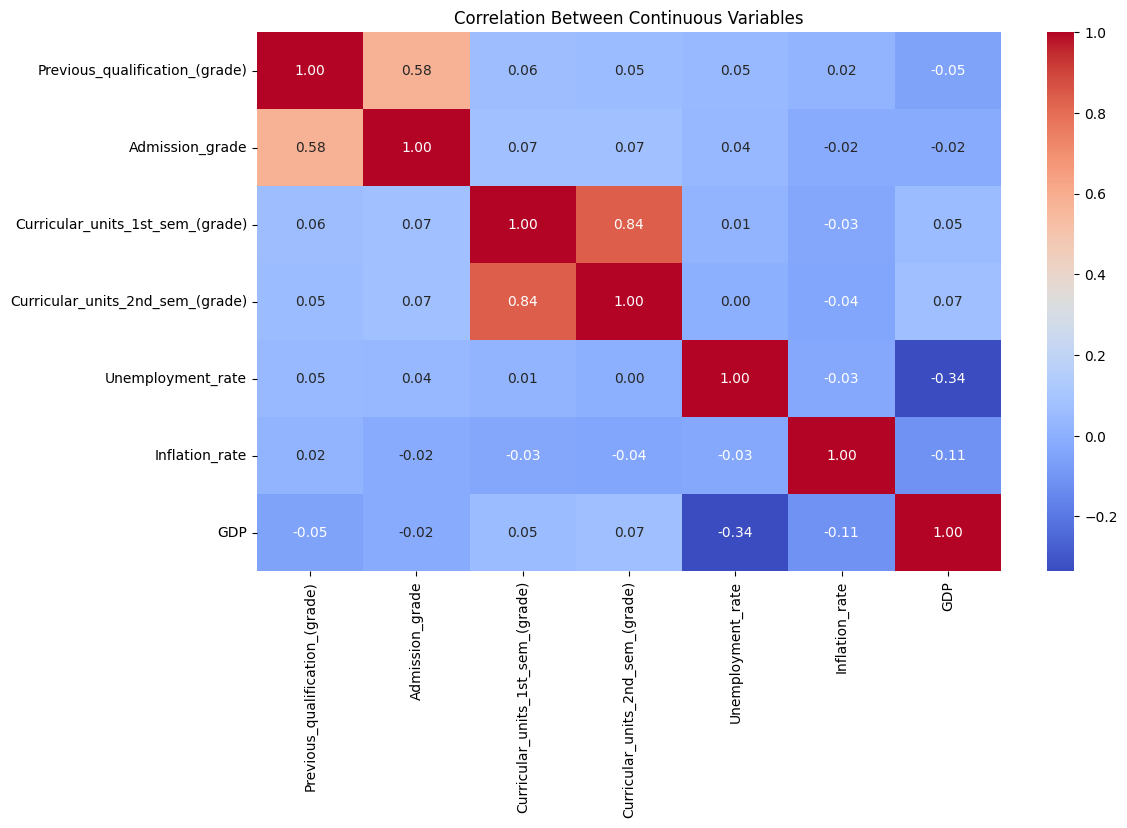

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 7))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Between Continuous Variables')
plt.show()



#### Observations:
- Strong correlation between `Curricular_units_1st_sem_(grade)` and `Curricular_units_2nd_sem_(grade)`.
- GDP, inflation rate, and unemployment rate are negatively correlated.


#### 2.7.2 Pairplot of Continuous Variables

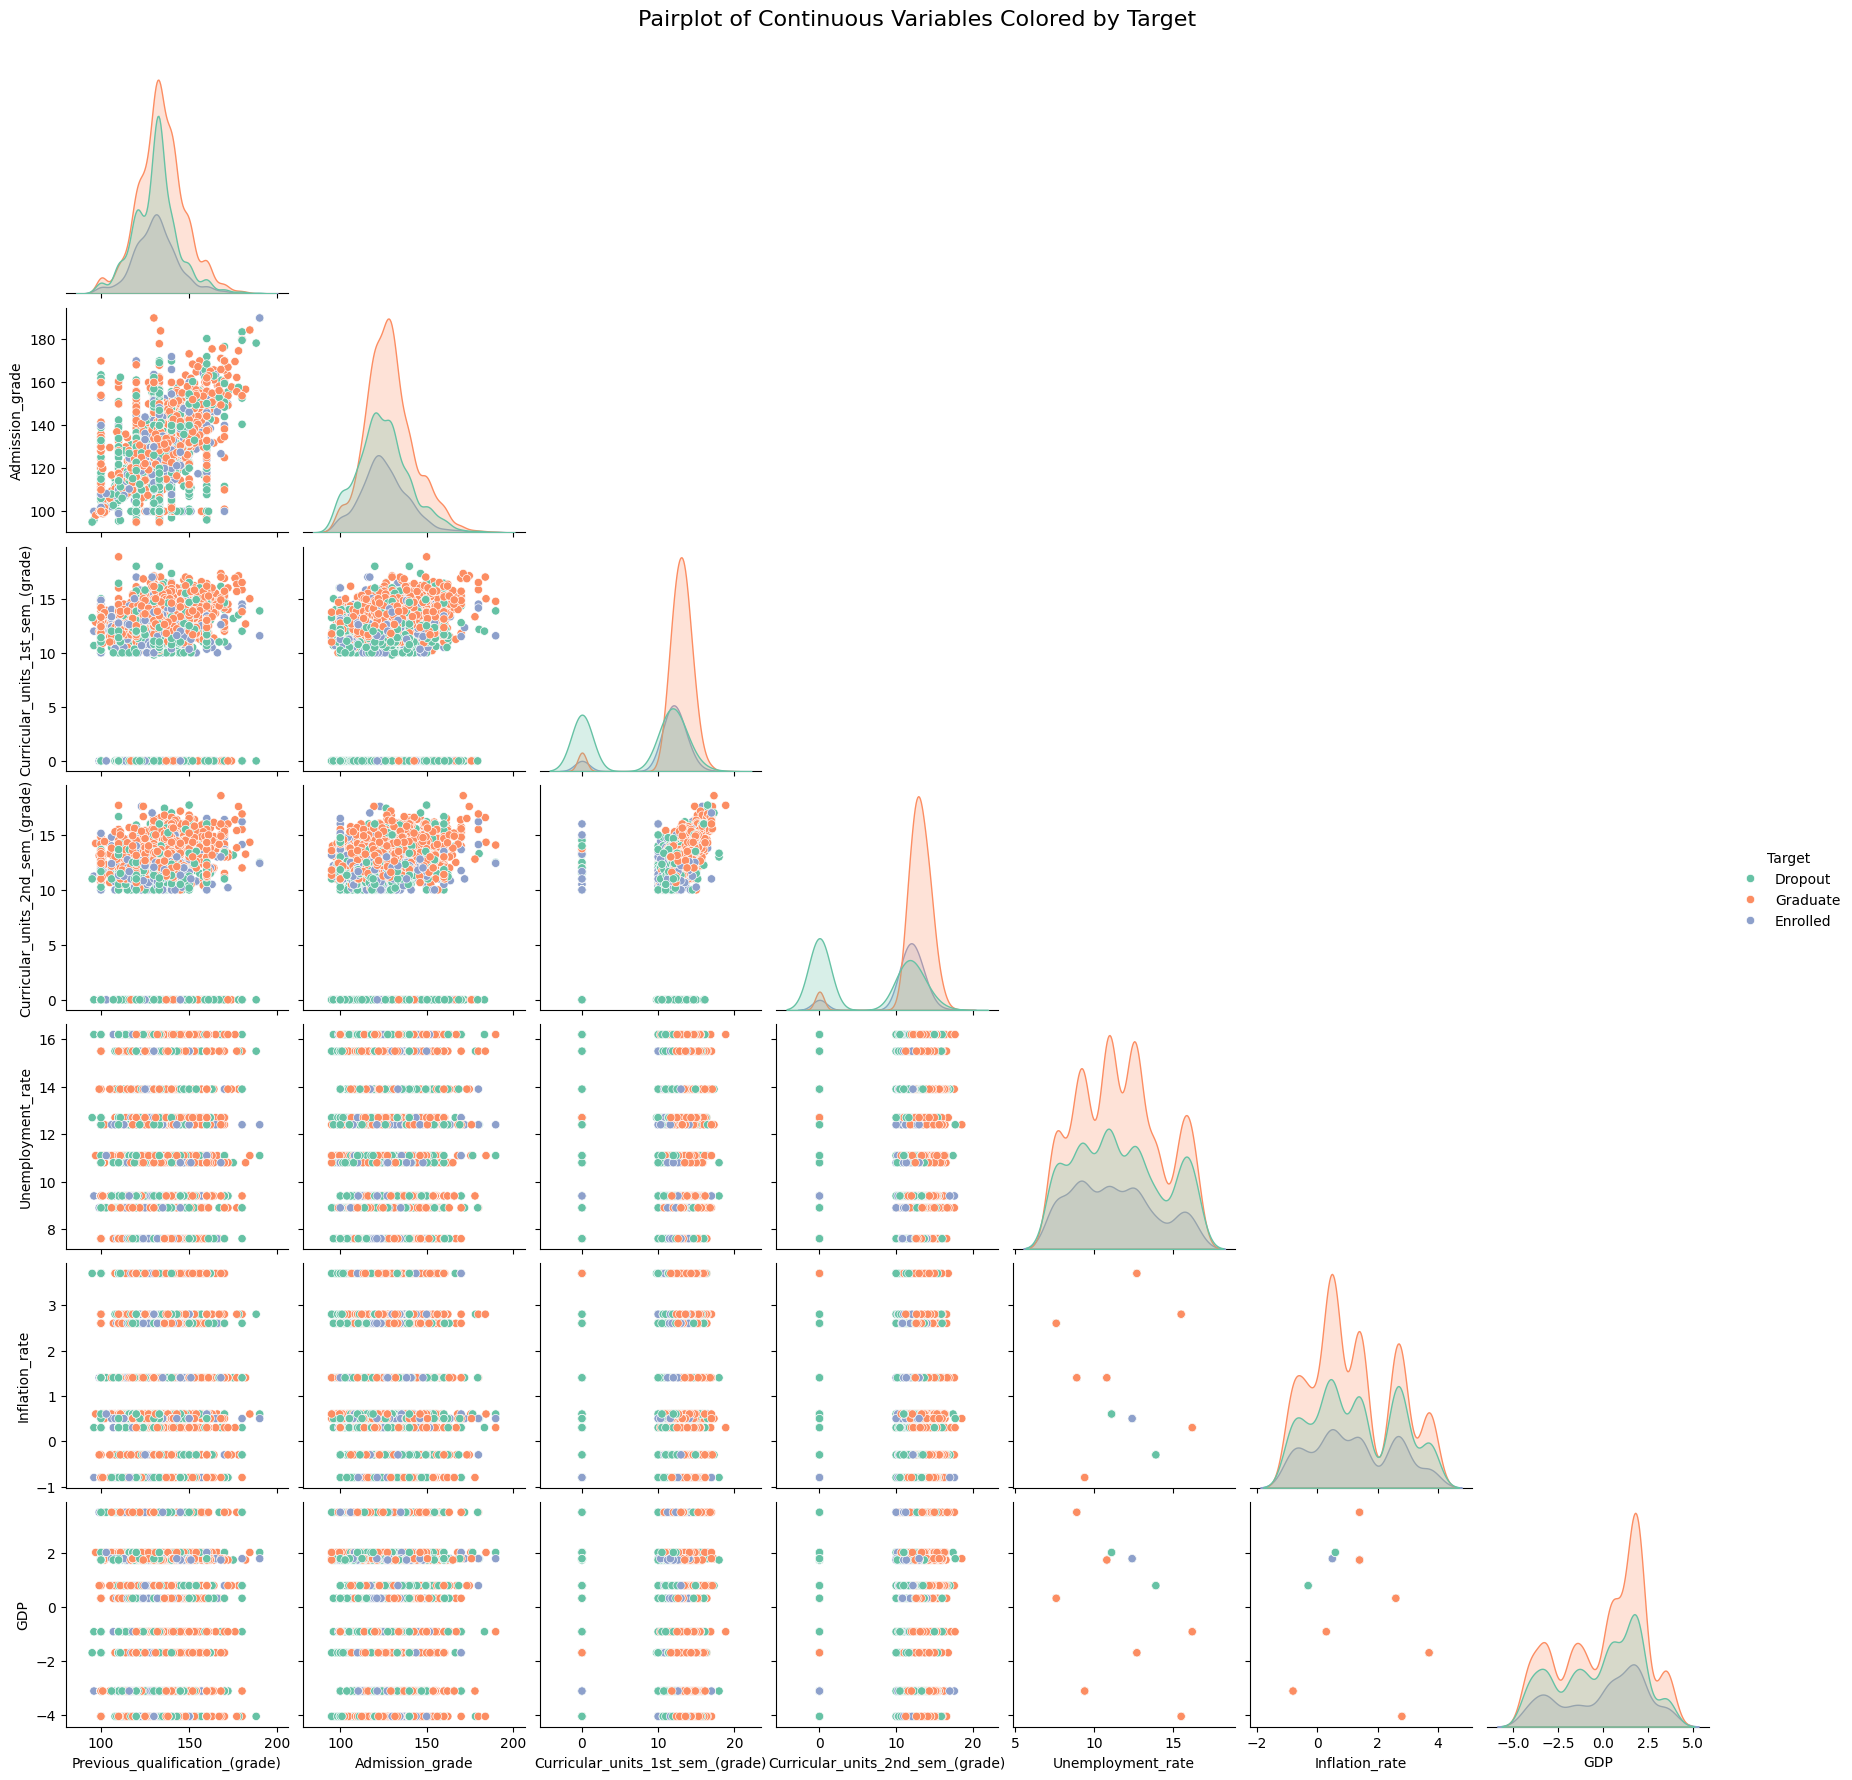

In [19]:
# Pairplot for continuous variables
sns.pairplot(data=data, vars=num_data, hue='Target', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Continuous Variables Colored by Target", y=1.02, fontsize=16)
plt.show()


# 3. Data Preprocessing

## Feature Engineering and Selection
This section demonstrates how to handle categorical data, encode target variables, and treat outliers in continuous features to prepare the dataset for further analysis.


### 3.1 Handling Categorical Data: Encoding the Target Variable
The target variable is currently categorical. We'll use `LabelEncoder` to convert it into numerical format for analysis and modeling.


In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode the Target variable
le = LabelEncoder()
data['Target'] = le.fit_transform(data['Target'])


In [63]:
data['Target']

1       2
3       2
4       2
5       2
6       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 3509, dtype: int32

### 3.2 Outlier Handling

#### 3.2.1 Visualizing Continuous Variables for Outliers
We'll identify potential outliers in key continuous variables by visualizing their distributions using boxplots.


In [21]:
data_num.columns

Index(['Previous_qualification_(grade)', 'Admission_grade',
       'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)',
       'Unemployment_rate', 'Inflation_rate', 'GDP'],
      dtype='object')

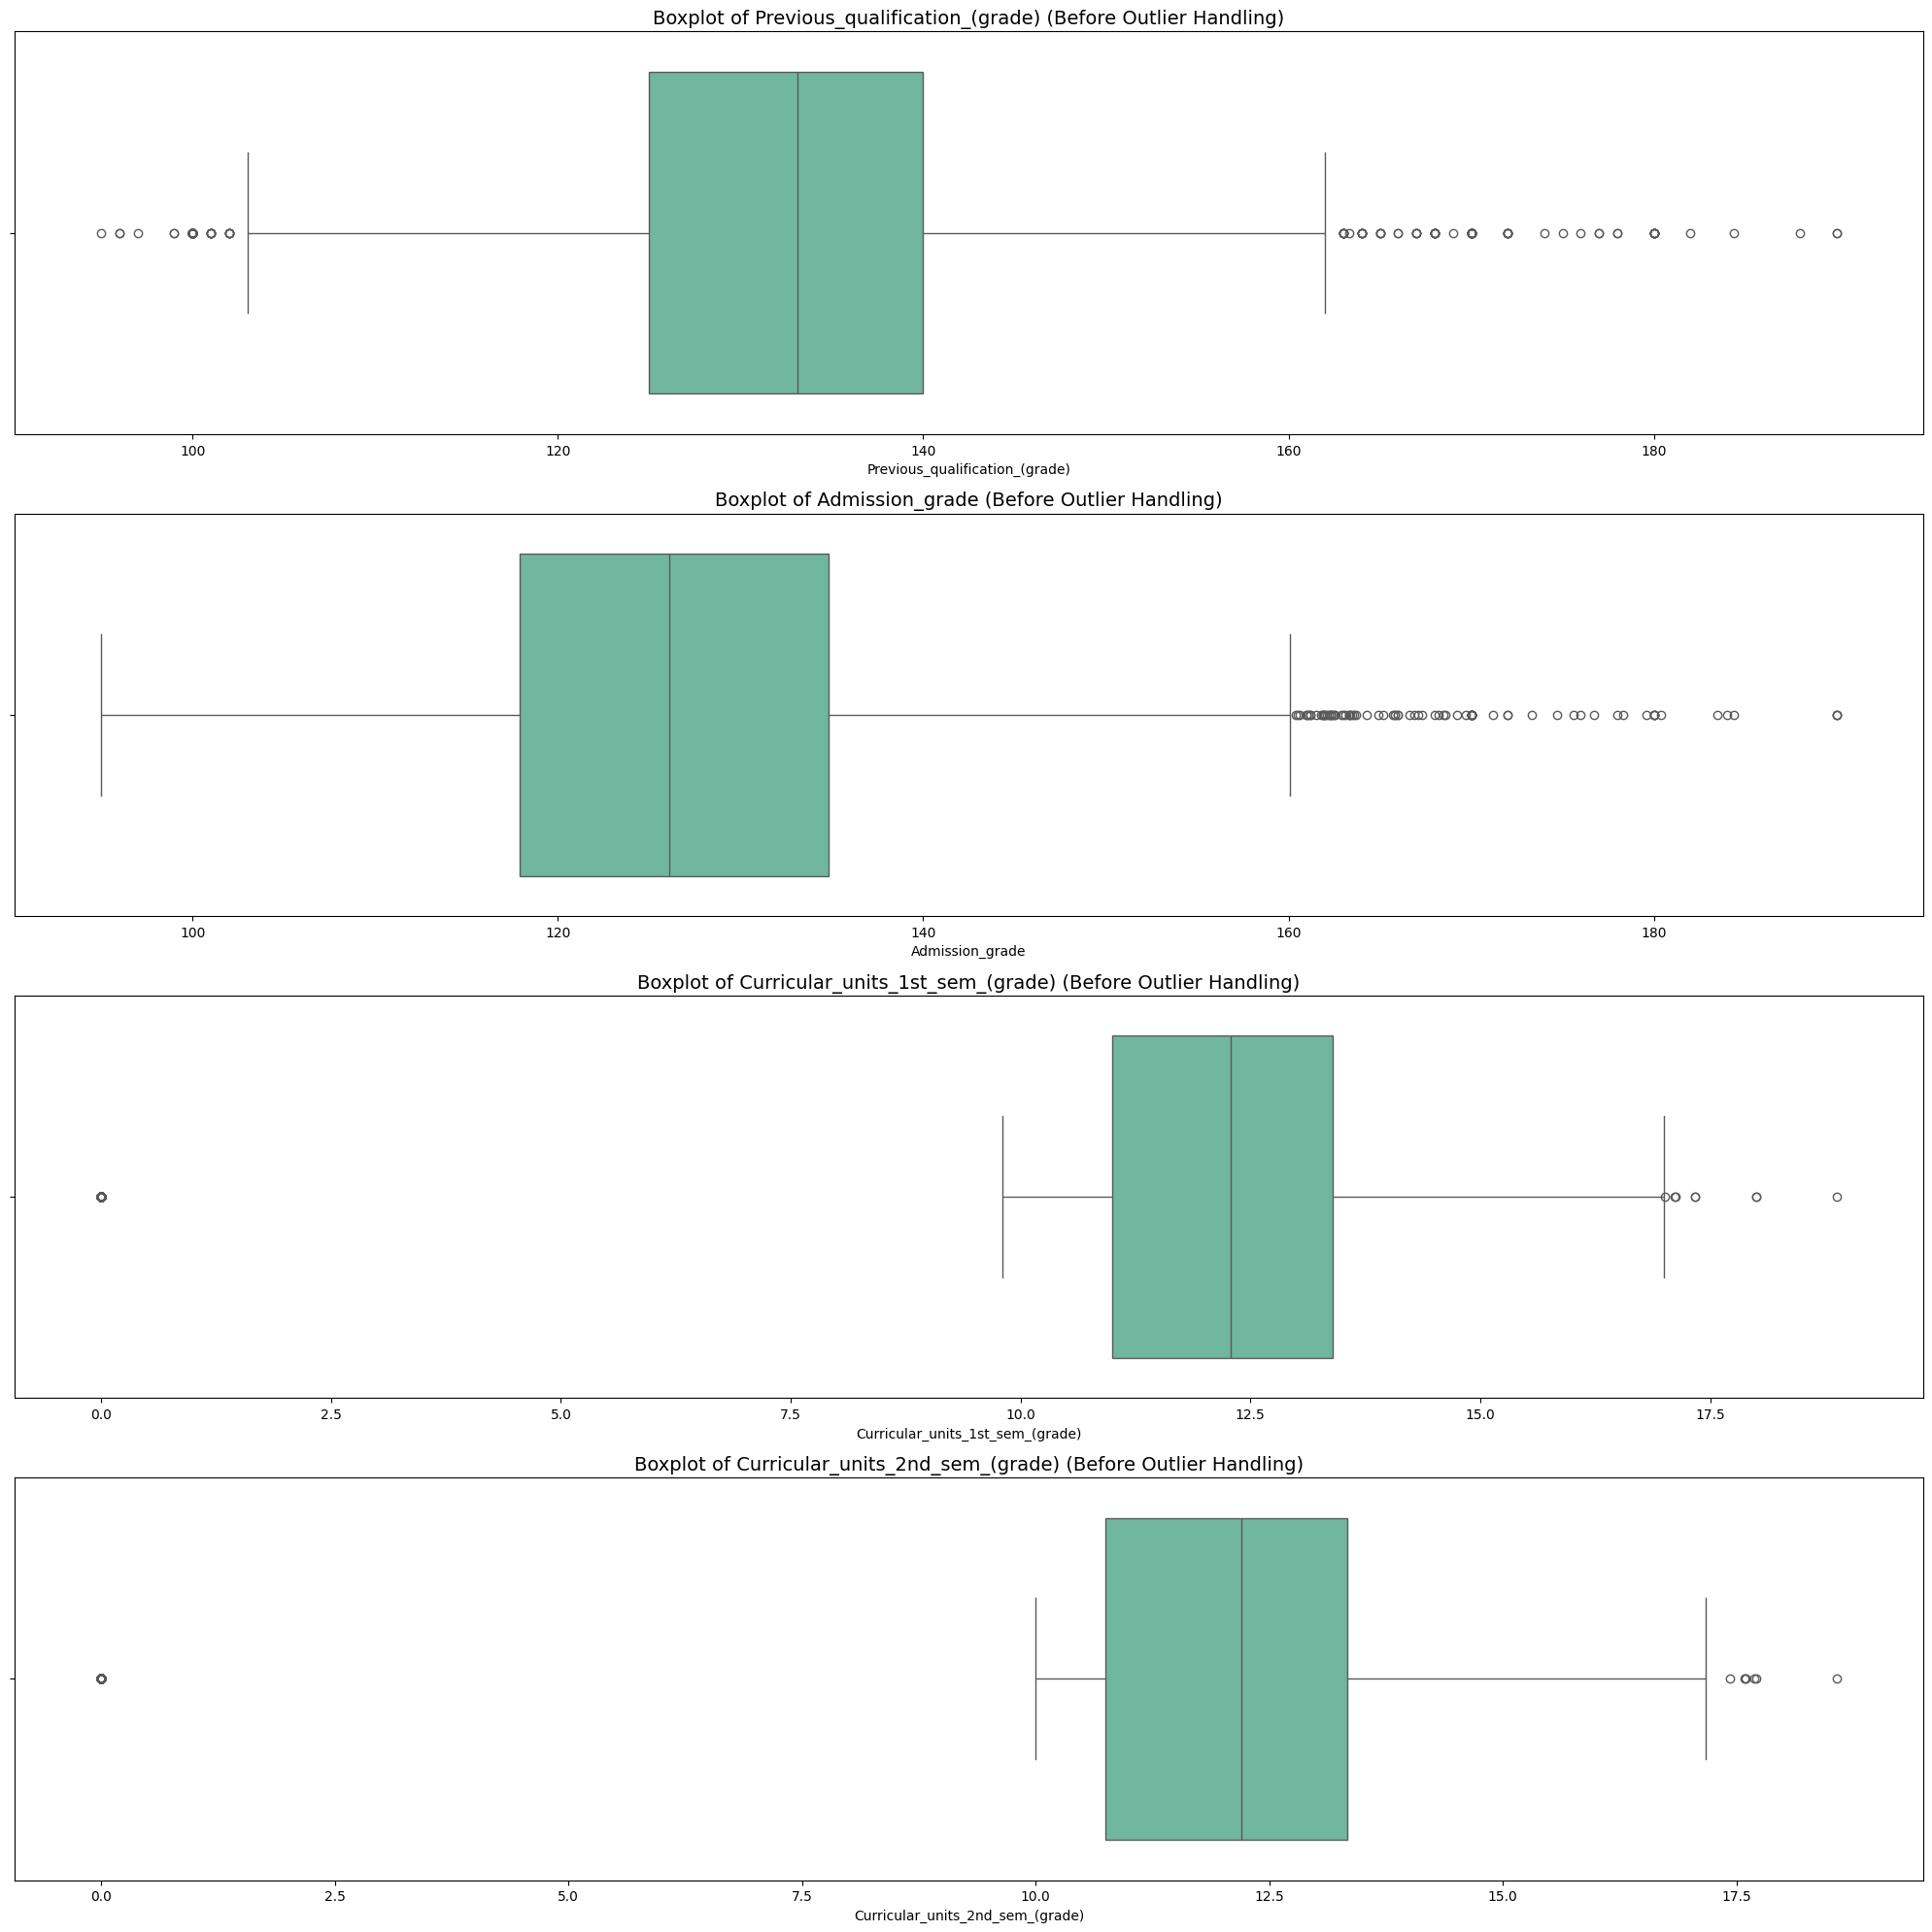

In [22]:
# Continuous variables to visualize
continuous_vars = ['Previous_qualification_(grade)', 'Admission_grade',
                   'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)']

# Boxplot before handling outliers
fig, axs = plt.subplots(len(continuous_vars), 1, figsize=(20, 20))
for i, col in enumerate(continuous_vars):
    sns.boxplot(x=data[col], ax=axs[i], palette='BuGn')
    axs[i].set_title(f'Boxplot of {col} (Before Outlier Handling)', fontsize=14)

plt.tight_layout()
plt.show()


### 3.2.2 Summary Statistics of Continuous Variables
Review the descriptive statistics of the continuous variables to better understand their distributions before handling outliers.


In [23]:
# Summary statistics before handling outliers
data[continuous_vars].describe()


,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade)
count,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,10.640822,10.230206
std,13.188332,14.482001,4.843663,5.210808
min,95.000000,95.000000,0.000000,0.000000
25%,125.000000,117.900000,11.000000,10.750000
50%,133.100000,126.100000,12.285714,12.200000
75%,140.000000,134.800000,13.400000,13.333333
max,190.000000,190.000000,18.875000,18.571429


### 3.2.3 Treat Outliers Using IQR
We use the Interquartile Range (IQR) method to detect and remove outliers. The IQR is calculated as:
- **IQR = Q3 - Q1**
- Data outside **[Q1 - 3*IQR, Q3 + 3*IQR]** is considered an outlier.


In [24]:
# Outlier treatment for each continuous variable
for col in continuous_vars:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 3*IQR) & (data[col] <= Q3 + 3*IQR)]


### 3.2.4 Summary Statistics After Outlier Handling
Check the descriptive statistics again to confirm that the extreme values have been addressed.


In [25]:
# Summary statistics after handling outliers
data[continuous_vars].describe()


,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade)
count,3509.000000,3509.000000,3509.000000,3509.000000
mean,132.599231,127.084981,12.749182,12.745582
std,12.977814,13.769560,1.328290,1.372024
min,95.000000,95.000000,10.000000,10.000000
25%,124.000000,118.400000,11.800000,11.750000
50%,133.000000,126.300000,12.666667,12.666667
75%,140.000000,134.500000,13.600000,13.666667
max,184.400000,184.400000,18.875000,18.571429


### 3.2.5 Visualizing Continuous Variables After Outlier Handling
Replot the boxplots to confirm that outliers have been successfully treated.


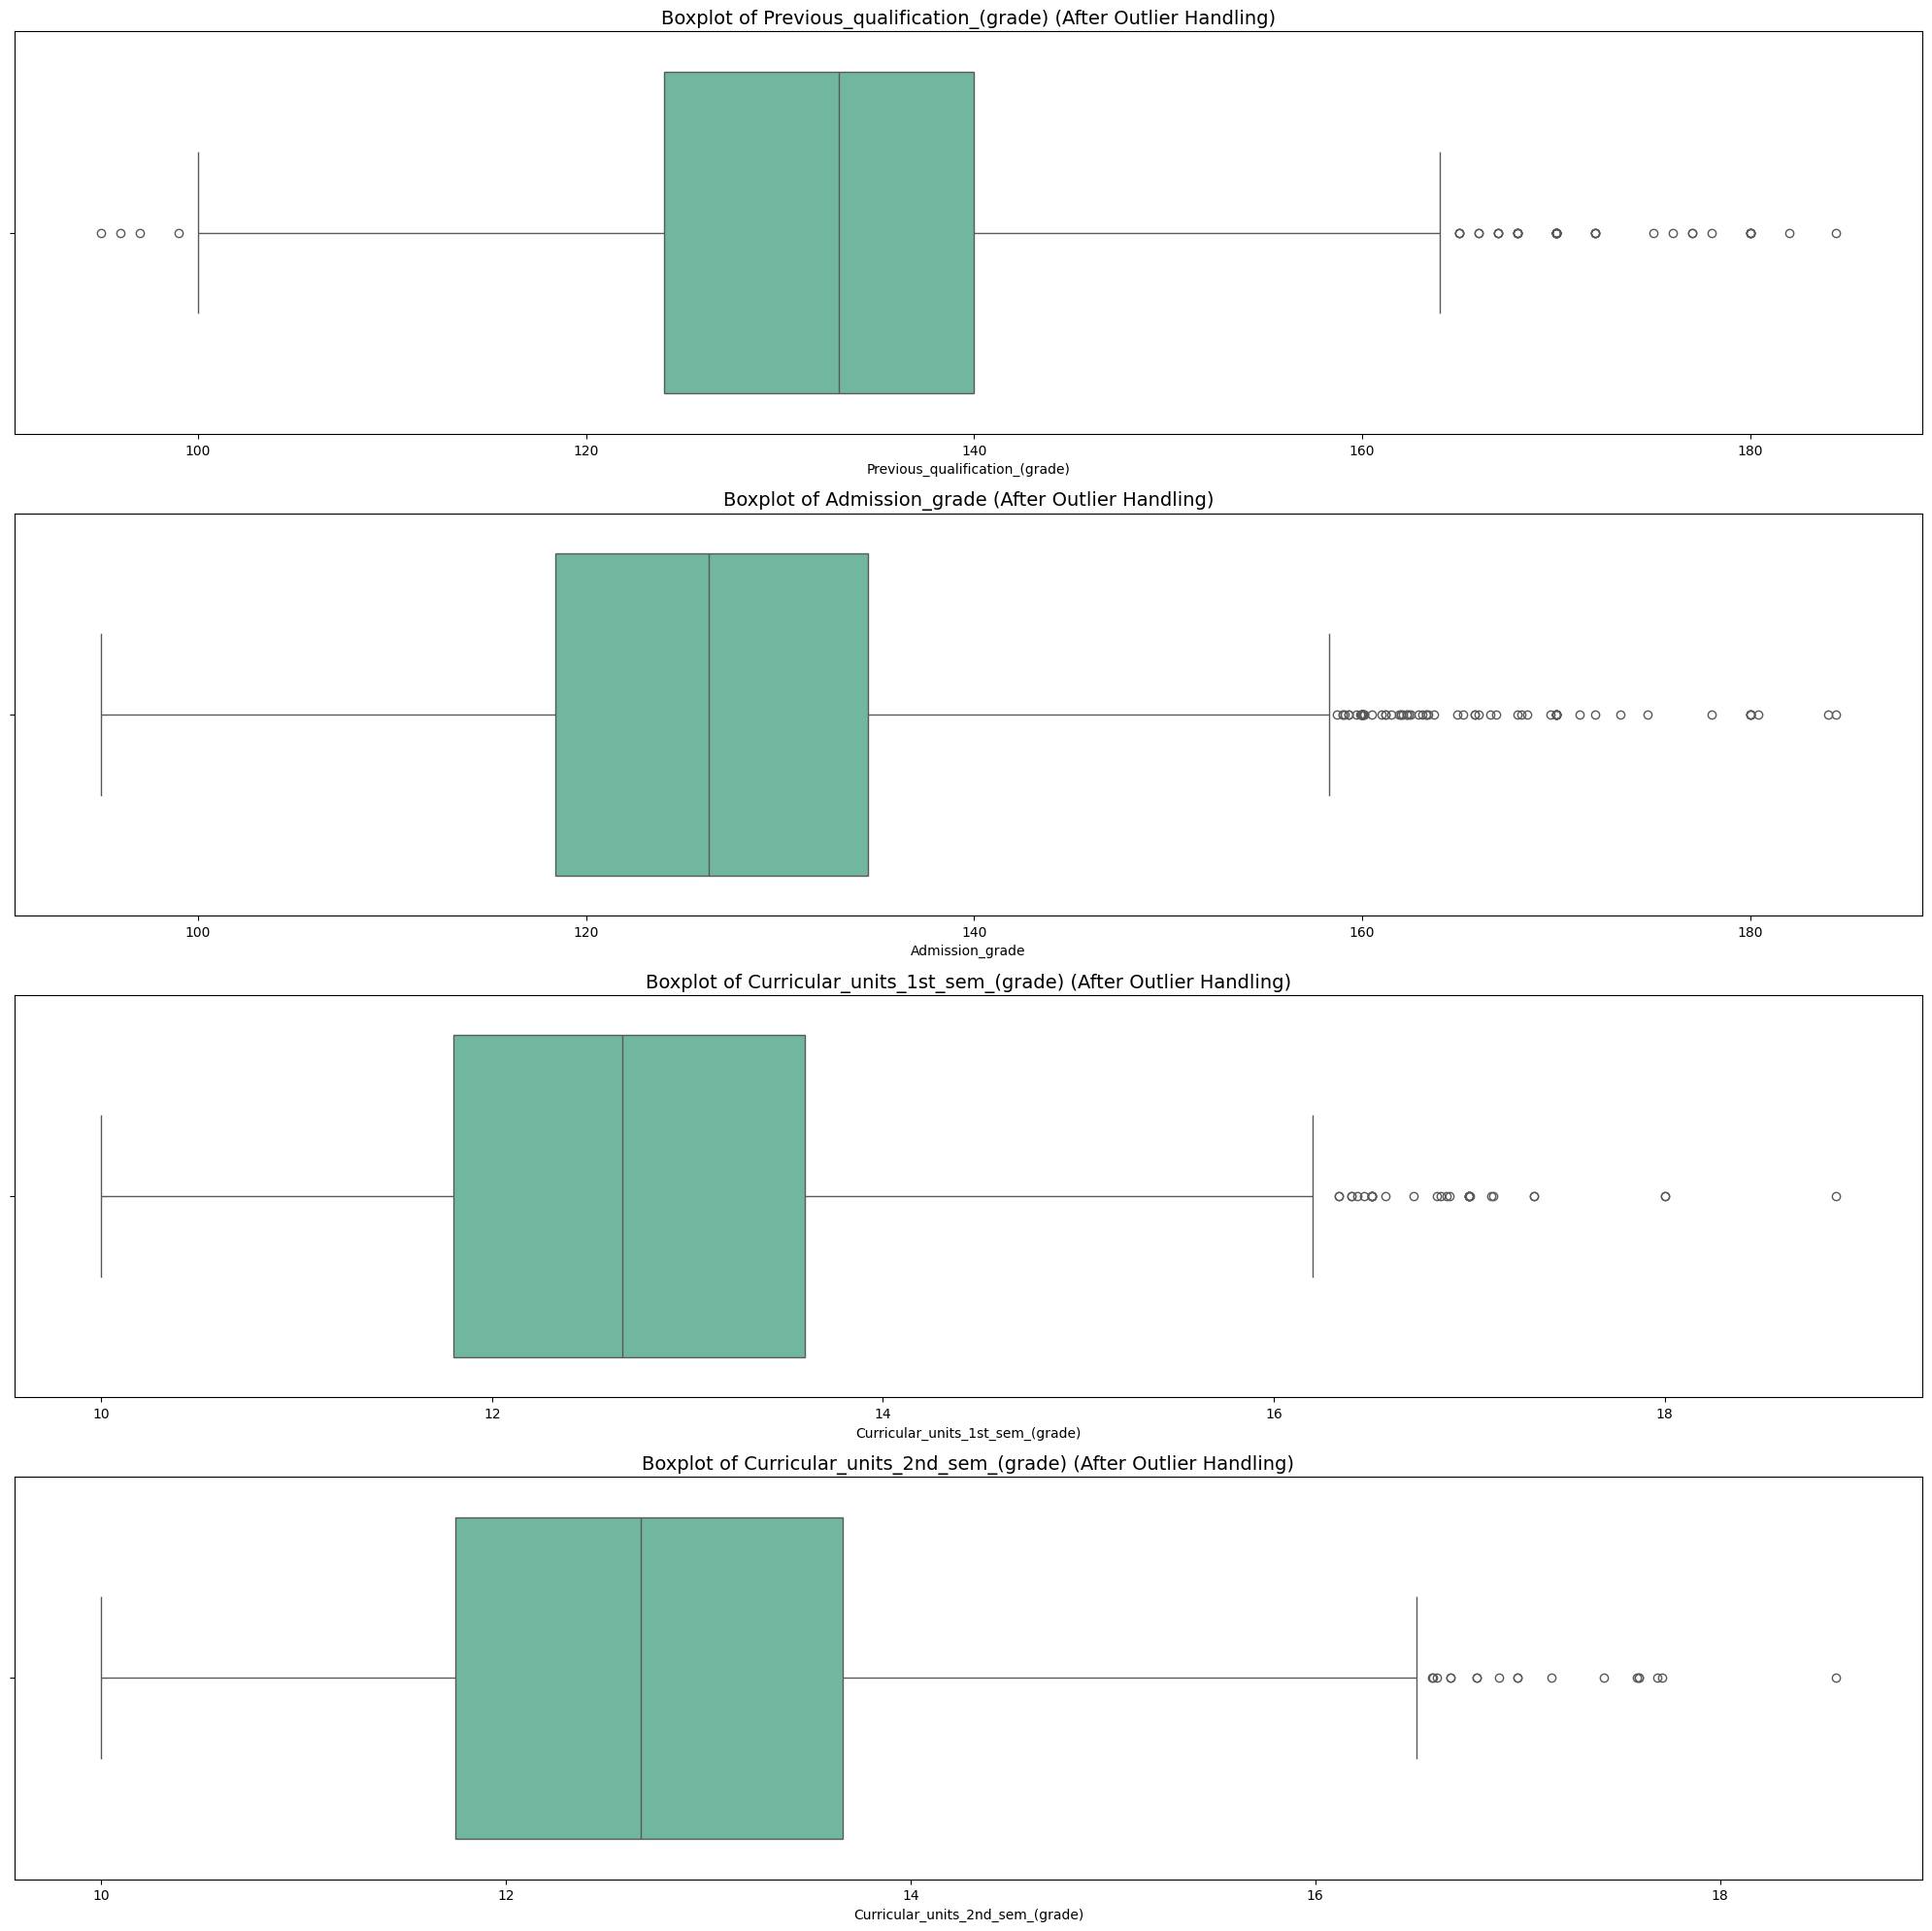

In [26]:
# Boxplot after handling outliers
fig, axs = plt.subplots(len(continuous_vars), 1, figsize=(20, 20))
for i, col in enumerate(continuous_vars):
    sns.boxplot(x=data[col], ax=axs[i], palette='BuGn')
    axs[i].set_title(f'Boxplot of {col} (After Outlier Handling)', fontsize=14)

plt.tight_layout()
plt.show()


## 3.3 Feature Selection using Chi-Square Test
The Chi-Square test helps us identify which categorical features are significantly related to the target variable (`Target`). This process allows us to drop irrelevant features and focus on those that add predictive value.


### 3.3.1 Splitting Data into Input Features and Target Variable
We first separate the input features (`X`) and the target variable (`y`) from the dataset.


In [27]:
# Define input features and target variable
X = data[['Curricular_units_2nd_sem_(enrolled)',
          'Scholarship_holder',
          'Application_order',
          'Curricular_units_1st_sem_(evaluations)',
          'Application_mode',
          'Course',
          'Nacionality',
          'Curricular_units_1st_sem_(without_evaluations)',
          'International',
          'Curricular_units_2nd_sem_(without_evaluations)',
          'Age_at_enrollment',
          'Curricular_units_1st_sem_(credited)',
          'Curricular_units_2nd_sem_(credited)',
          'Debtor',
          'Daytime/evening_attendance\t',
          'Marital_status',
          'Previous_qualification',
          "Mother's_qualification",
          'Curricular_units_1st_sem_(approved)',
          "Mother's_occupation",
          'Gender',
          'Displaced',
          'Curricular_units_2nd_sem_(evaluations)',
          'Tuition_fees_up_to_date',
          'Educational_special_needs',
          "Father's_qualification",
          'Curricular_units_2nd_sem_(approved)',
          'Curricular_units_1st_sem_(enrolled)',
          "Father's_occupation"]]

y = data['Target']


### 3.3.2 Performing Chi-Square Test
The Chi-Square test calculates the relationship between input categorical variables and the target variable. It returns:
- **F-Score**: The strength of the relationship.
- **P-Value**: The statistical significance of the relationship.


In [28]:
from sklearn.feature_selection import chi2

# Perform Chi-Square test
f_score = chi2(X, y)

# Extract p-values and sort them
p_value = pd.Series(f_score[1], index=X.columns).sort_values(ascending=True)
print(p_value)


Mother's_occupation                                0.000000e+00
Application_mode                                   0.000000e+00
Father's_occupation                               1.315731e-272
Curricular_units_2nd_sem_(approved)               1.597835e-148
Curricular_units_1st_sem_(approved)                6.108383e-92
Previous_qualification                             1.106835e-78
Age_at_enrollment                                  2.193555e-55
Curricular_units_2nd_sem_(evaluations)             5.509562e-53
Curricular_units_1st_sem_(evaluations)             3.685394e-47
Debtor                                             8.448138e-45
Course                                             9.805967e-41
Curricular_units_1st_sem_(credited)                1.879439e-40
Scholarship_holder                                 2.106448e-37
Mother's_qualification                             4.613949e-37
Curricular_units_2nd_sem_(credited)                4.435544e-33
Gender                                  

### 3.3.3 Interpreting the Results
Based on the p-value:
- **P-Value < 0.05**: Reject the null hypothesis, meaning the feature is related to the target.
- **P-Value ≥ 0.05**: Accept the null hypothesis, meaning the feature is independent of the target.


In [29]:
# Identify features with significant and non-significant relationships
significance_level = 0.05
i_cols = []  # Store non-significant features

for feature in p_value.index:
    if p_value[feature] <= significance_level:
        print(feature, ":- Reject NULL HYPOTHESIS (Significant)")
    else:
        print(feature, ":- ACCEPT NULL HYPOTHESIS (Not Significant)")
        i_cols.append(feature)


Mother's_occupation :- Reject NULL HYPOTHESIS (Significant)
Application_mode :- Reject NULL HYPOTHESIS (Significant)
Father's_occupation :- Reject NULL HYPOTHESIS (Significant)
Curricular_units_2nd_sem_(approved) :- Reject NULL HYPOTHESIS (Significant)
Curricular_units_1st_sem_(approved) :- Reject NULL HYPOTHESIS (Significant)
Previous_qualification :- Reject NULL HYPOTHESIS (Significant)
Age_at_enrollment :- Reject NULL HYPOTHESIS (Significant)
Curricular_units_2nd_sem_(evaluations) :- Reject NULL HYPOTHESIS (Significant)
Curricular_units_1st_sem_(evaluations) :- Reject NULL HYPOTHESIS (Significant)
Debtor :- Reject NULL HYPOTHESIS (Significant)
Course :- Reject NULL HYPOTHESIS (Significant)
Curricular_units_1st_sem_(credited) :- Reject NULL HYPOTHESIS (Significant)
Scholarship_holder :- Reject NULL HYPOTHESIS (Significant)
Mother's_qualification :- Reject NULL HYPOTHESIS (Significant)
Curricular_units_2nd_sem_(credited) :- Reject NULL HYPOTHESIS (Significant)
Gender :- Reject NULL HY

### 3.3.4 Dropping Irrelevant Features
Based on the Chi-Square test, we drop features with p-values ≥ 0.05, as they do not significantly relate to the target variable.


In [30]:
# Drop irrelevant features
data.drop(labels=i_cols, axis=1, inplace=True)
print(f"Dropped columns: {i_cols}")


Dropped columns: ['Marital_status', 'Daytime/evening_attendance\t', 'Educational_special_needs', 'International']


#### Insights from the Chi-Square Test

From the Chi-Square test, we observe that only 4 features have no significant relationship with the target variable. 
Since these features do not contribute to predicting the target variable, we can safely drop them and focus on the remaining features for further analysis.


### 3.3.5 Verifying the Updated Dataset
After removing irrelevant features, we inspect the updated dataset to ensure only significant features remain.


In [31]:
# Display the updated dataset
data.head()


,Application_mode,Application_order,Course,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,Father's_occupation,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
1,15,1,9254,1,160.0,1,1,3,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
3,17,2,9773,1,122.0,1,38,37,5,3,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,39,1,8014,1,100.0,1,37,38,9,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
5,39,1,9991,19,133.1,1,37,37,9,7,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,2
6,1,1,9500,1,142.0,1,19,38,7,10,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,2


# 4. Data Preprocessing

In this section, we will:
1. Drop irrelevant features from the dataset.

2. Split the dataset into input features (`X`) and the target variable (`y`).
3. We will encode the categorical and numerical features
3. Balance the dataset using **SMOTE (Synthetic Minority Oversampling Technique)** to handle any class imbalance.
4. Split the data into training and test sets for model evaluation.


In [32]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

### 4.1: Dropping Irrelevant Features
The following features are no longer needed for modeling and will be removed:
- **`Previous_qualification_(grade)`**
- **`Admission_grade`**
- **`Curricular_units_1st_sem_(grade)`**
- **`Curricular_units_2nd_sem_(grade)`**

Removing these features will simplify the dataset.


In [33]:
# Drop irrelevant features
data.drop(['Previous_qualification_(grade)', 'Admission_grade', 
           'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)'], axis=1, inplace=True)

# Check the updated dataset
data.head()


,Application_mode,Application_order,Course,Previous_qualification,Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,Father's_occupation,Displaced,...,Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
1,15,1,9254,1,1,1,3,3,3,1,...,0,0,6,6,6,0,13.9,-0.3,0.79,2
3,17,2,9773,1,1,38,37,5,3,1,...,0,0,6,10,5,0,9.4,-0.8,-3.12,2
4,39,1,8014,1,1,37,38,9,9,0,...,0,0,6,6,6,0,13.9,-0.3,0.79,2
5,39,1,9991,19,1,37,37,9,7,0,...,0,0,5,17,5,5,16.2,0.3,-0.92,2
6,1,1,9500,1,1,19,38,7,10,1,...,0,0,8,8,8,0,15.5,2.8,-4.06,2


### 4.2 : Splitting the Dataset into Features and Target
We separate the dataset into:
- **`X`**: Input features.
- **`y`**: Target variable.


In [34]:
# Split the data into input features and target variable
X = data.drop('Target', axis=1)
y = data['Target']


### 4.3: Splitting the Data into Training and Test Sets
We split the balanced dataset into:
- **Training Set**: 80% of the data, used to train the model.
- **Test Set**: 20% of the data, used to evaluate the model.


In [35]:
# Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Checking the shape of the splits
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (2807, 28), Test Set: (702, 28)


### 4.4 Data Preparation on Train and Test data

In this code, we prepare the dataset for machine learning by encoding categorical features and scaling continuous features:

In [36]:
# List of categorical features (these represent categories, not numbers)
categorical_features = [
     'Application_mode', 'Application_order', 'Course',
    'Previous_qualification', 'Nacionality',
    'Mother\'s_qualification', 'Father\'s_qualification', 'Mother\'s_occupation',
    'Father\'s_occupation', 'Displaced', 
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
    
]

# List of continuous features (these are actual numbers)
continuous_features = [
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]


In [37]:
# Encode categorical variables using OrdinalEncoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[categorical_features] = ordinal_encoder.fit_transform(X_train[categorical_features])
X_test[categorical_features] = ordinal_encoder.transform(X_test[categorical_features])

In [38]:
# Scale continuous variables using StandardScaler
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [39]:
# Check the transformed data
print("Transformed Training Data:")
print(X_train.shape)

print("Transformed Test Data:")
print(X_test.shape)

Transformed Training Data:
(2807, 28)
Transformed Test Data:
(702, 28)


In [40]:
X_train.head()

,Application_mode,Application_order,Course,Previous_qualification,Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,Father's_occupation,Displaced,...,Curricular_units_1st_sem_(approved),Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP
1680,0.0,0.0,6.0,0.0,0.0,21.0,19.0,9.0,7.0,1.0,...,3,0,0,5,9,2,2,-1.508399,1.025544,0.109850
303,14.0,0.0,13.0,0.0,0.0,11.0,10.0,5.0,5.0,0.0,...,2,0,0,5,6,4,0,-0.827959,-1.463542,-1.397989
3212,0.0,0.0,10.0,0.0,0.0,2.0,1.0,4.0,5.0,0.0,...,6,0,0,6,6,6,0,-1.016970,0.147043,1.508108
2160,0.0,3.0,11.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,...,7,0,0,8,8,7,0,-0.298728,0.147043,0.732272
543,0.0,0.0,11.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,...,7,0,0,8,9,8,0,1.742592,-0.658250,-0.433673


In [41]:
X_test.head()

,Application_mode,Application_order,Course,Previous_qualification,Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,Father's_occupation,Displaced,...,Curricular_units_1st_sem_(approved),Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP
871,10.0,0.0,6.0,0.0,0.0,17.0,15.0,0.0,0.0,1.0,...,1,0,0,5,9,2,0,-0.827959,-1.463542,-1.397989
1162,7.0,2.0,11.0,0.0,0.0,21.0,0.0,9.0,5.0,1.0,...,7,0,0,8,8,7,0,-0.298728,0.147043,0.732272
199,10.0,0.0,11.0,0.0,0.0,0.0,2.0,26.0,-1.0,0.0,...,3,0,0,3,3,3,0,-0.185321,-0.438624,0.855003
1963,0.0,1.0,11.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,...,7,0,0,8,8,8,0,0.873141,-1.097500,0.315863
18,0.0,0.0,7.0,0.0,0.0,2.0,10.0,3.0,5.0,1.0,...,4,1,0,5,8,4,2,-0.298728,0.147043,0.732272


### 4.4: Balancing the Dataset using SMOTE
Since the dataset may have imbalanced classes, we use **SMOTE** to balance it. This generates synthetic samples for the minority class, ensuring that all classes have equal representation.


In [42]:
# Balance the data using SMOTE
sm = SMOTE(random_state=23)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Checking the shape of the splits
print(f"Training Set: {X_train_sm.shape}, Test Set: {X_test.shape}")

Training Set: (5121, 28), Test Set: (702, 28)


# 5 Model Building and Evaluation
This section covers:
1. Training multiple classification models.
2. Evaluating models using accuracy, F1-score, classification reports, and confusion matrices.
3. Comparing model performance visually.


### 5.1: Import Libraries
We will use multiple classification models and evaluation metrics for analysis.


In [43]:
# pip install xgboost


In [44]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix,ConfusionMatrixDisplay

### 5.2: Train and Evaluate Models
Each model will be trained, evaluated, and visualized using a confusion matrix.


#### 5.2.1. Decision Tree Classifier

In [45]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [46]:
# Make predictions
y_pred_dt = dt.predict(X_test)

In [47]:
# Evaluate the model
print("Decision Tree - Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree - F1-Score:", f1_score(y_test, y_pred_dt, average=None))
print(classification_report(y_test, y_pred_dt))

Decision Tree - Accuracy Score: 0.6324786324786325
Decision Tree - F1-Score: [0.45714286 0.37888199 0.78136201]
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       128
           1       0.35      0.41      0.38       150
           2       0.79      0.77      0.78       424

    accuracy                           0.63       702
   macro avg       0.54      0.54      0.54       702
weighted avg       0.64      0.63      0.64       702



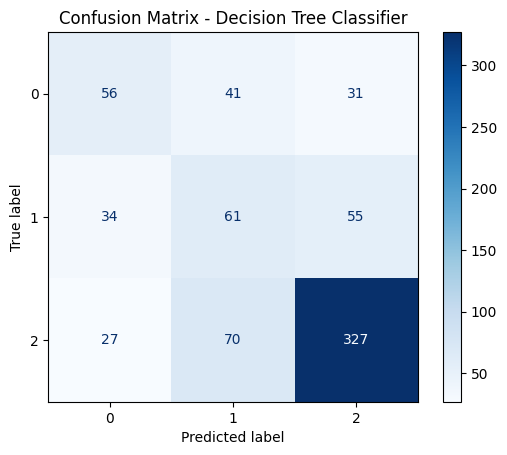

In [48]:
# Plot Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

#### 5.2.2. Random Forest Classifier

In [49]:
# Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [50]:
# Make predictions
y_pred_rf = rf.predict(X_test)

In [51]:
# Evaluate the model
print("Random Forest - Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - F1-Score:", f1_score(y_test, y_pred_rf, average=None))
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy Score: 0.7507122507122507
Random Forest - F1-Score: [0.61261261 0.54109589 0.85393258]
              precision    recall  f1-score   support

           0       0.72      0.53      0.61       128
           1       0.56      0.53      0.54       150
           2       0.82      0.90      0.85       424

    accuracy                           0.75       702
   macro avg       0.70      0.65      0.67       702
weighted avg       0.74      0.75      0.74       702



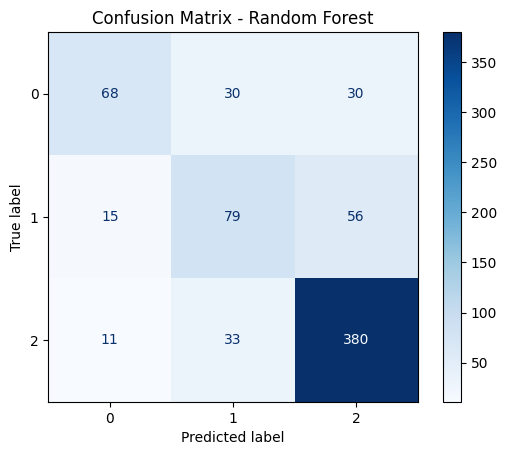

In [52]:
# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### 5.2.3. Extreme Gradient Boosting (XGBoost)

In [53]:
# XGBoost Classifier
xgb = XGBClassifier()

# Fit the model
xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
# Make predictions
y_pred_xgb = xgb.predict(X_test)

In [55]:
# Evaluate the model
print("XGBoost - Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost - F1-Score:", f1_score(y_test, y_pred_xgb, average=None))
print(classification_report(y_test, y_pred_xgb))


XGBoost - Accuracy Score: 0.7592592592592593
XGBoost - F1-Score: [0.65137615 0.52707581 0.85588559]
              precision    recall  f1-score   support

           0       0.79      0.55      0.65       128
           1       0.57      0.49      0.53       150
           2       0.80      0.92      0.86       424

    accuracy                           0.76       702
   macro avg       0.72      0.65      0.68       702
weighted avg       0.75      0.76      0.75       702



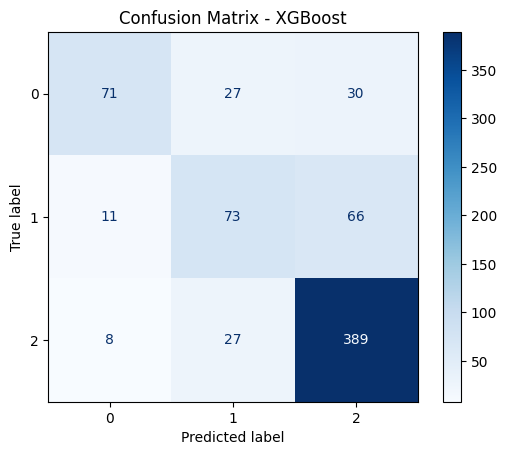

In [56]:
# Plot Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.show()

#### 5.2.2. Logistic Regression model

In [57]:
# Logistic Regression Classifier
lr = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000, random_state=42)

In [58]:
# Make predictions
y_pred_lr = lr.predict(X_test)

In [59]:
# Evaluate the model
print("Logistic Regression - Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - F1-Score:", f1_score(y_test, y_pred_lr, average=None))
print(classification_report(y_test, y_pred_lr))

Logistic Regression - Accuracy Score: 0.7393162393162394
Logistic Regression - F1-Score: [0.59414226 0.54071661 0.85081585]
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       128
           1       0.53      0.55      0.54       150
           2       0.84      0.86      0.85       424

    accuracy                           0.74       702
   macro avg       0.67      0.66      0.66       702
weighted avg       0.74      0.74      0.74       702



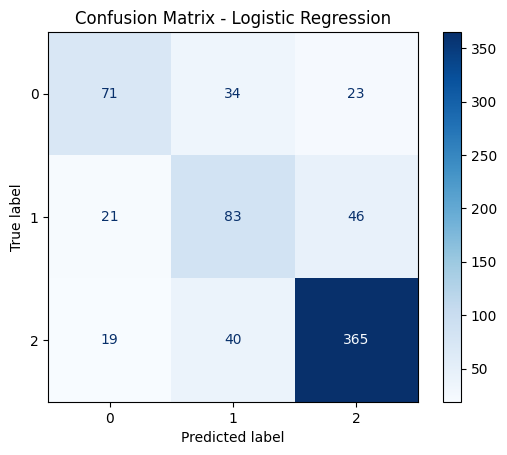

In [60]:
# Plot Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 5.3 : Model Comparison
Compare the performance of all models visually based on their accuracy scores.


#### 5.3.1 Accuracy Comparison

In [61]:
# Compare model performance
models = pd.DataFrame({
    'Classifiers': ['Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt) * 100,
        accuracy_score(y_test, y_pred_rf) * 100,
        accuracy_score(y_test, y_pred_xgb) * 100,
        accuracy_score(y_test, y_pred_lr) * 100,
    ]
})

#### 5.3.2 Visualizing Model Performance

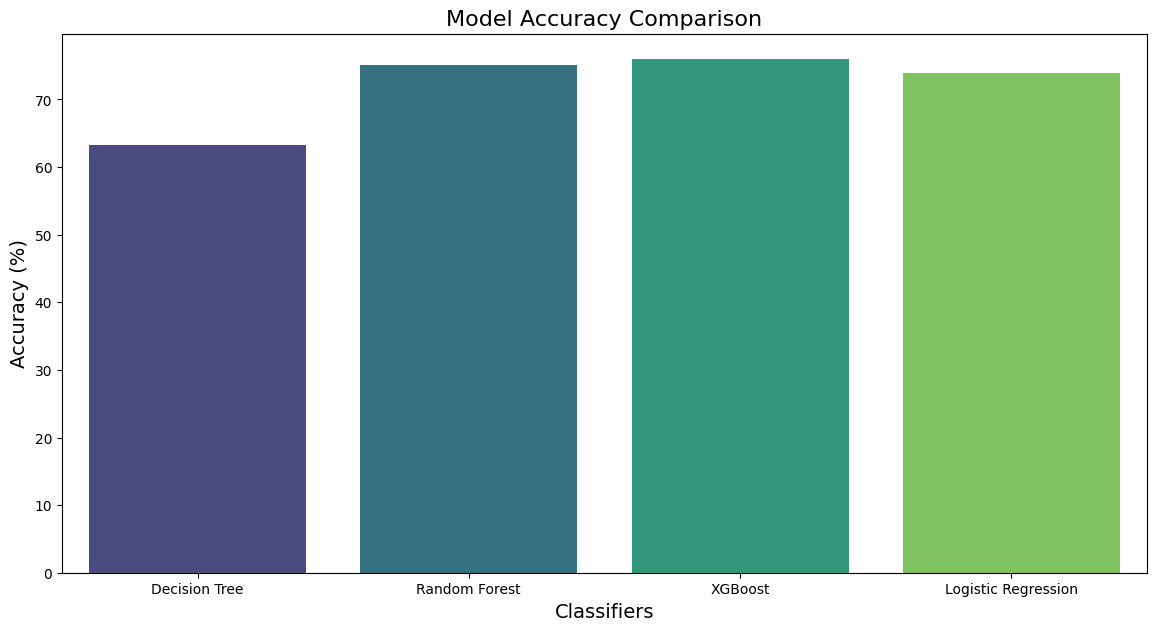

In [62]:
# Plot the comparison
plt.figure(figsize=(14, 7))
sns.barplot(x='Classifiers', y='Accuracy', data=models, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.show()
